In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba    ]


#

In [2]:
os.getcwd()  # Muestra la ruta actual


'c:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Configuración desde el archivo txt (simulada aquí como un diccionario)
config = {
    'figure.constrained_layout.use': True,
    'figure.figsize': (5.4, 3.2),
    'figure.titlesize': 'small',
    'figure.labelsize': 'small',
    'font.size': 10,
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.texsystem': 'lualatex',
    'pgf.rcfonts': False,
    'pgf.preamble': r'\usepackage{siunitx,fontspec}\setmainfont{Times New Roman}',
    'lines.linewidth': 1,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 4,
    'legend.frameon': False,
    'legend.markerscale': 0.8,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.2,
    'xtick.top': True,
    'xtick.major.size': 5,
    'xtick.major.width': 0.8,
    'xtick.minor.width': 0.8,
    'xtick.minor.size': 3,
    'xtick.labelsize': 'small',
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.major.size': 5,
    'ytick.major.width': 0.8,
    'ytick.minor.width': 0.8,
    'ytick.minor.size': 3,
    'ytick.labelsize': 'small',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8,
    'axes.axisbelow': False,
    'axes.labelsize': 'medium',
    'axes.labelpad': 2,
    'figure.constrained_layout.h_pad': 0.02,
    'figure.constrained_layout.w_pad': 0.01,
    'figure.constrained_layout.hspace': 0.02,
    'figure.constrained_layout.wspace': 0.02,
    'svg.fonttype': 'none'
}

# Aplicar la configuración
plt.rcParams.update(config)

In [5]:
ruta_actual = os.getcwd()

carpeta = os.path.join(ruta_actual, 'PbTe', '20-20')

#rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20'
carpeta_ref = os.path.join(ruta_actual,"PbTe","substrate","20-20")
#carpeta_ref = rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\substrate\20-20'

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

N = 4 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

['20231207-132823__Eduardo__THZ57-60__PMP0__S2207L__8RH__300K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON - Copia.dat', '20231207-132823__Eduardo__THZ57-60__PMP0__S2207L__8RH__300K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-132911__Eduardo__THZ57-60__PMP0__S2207L__8RH__300K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133137__Eduardo__THZ57-60__PMP0__S2207L__8RH__280K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133225__Eduardo__THZ57-60__PMP0__S2207L__8RH__280K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133314__Eduardo__THZ57-60__PMP0__S2207L__8RH__280K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133540__Eduardo__THZ57-60__PMP0__S2207L__8RH__260K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133630__Eduardo__THZ57-60__PMP0__S2207L__8RH__260K__2x3mmTeflonWindows+3mmHole+15088__1.6umPbTe-HePumpON.dat', '20231207-133719__Eduar

In [6]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

# bis = [0.02,0.03,0.06,0.07,0.1,0.15] # Porcentaje de Bismuto.

delta_ls = {"20-20": 0.446-0.360, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20-20"
d = 0.0016

In [7]:
delta_ls

{'20-20': 0.08600000000000002}

In [8]:
def D(E):
    return abs(E[-1] - E[0]) / max(E)  # Diferencia entre el máximo y el mínimo de la energía.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\esteb\AppData\Local\Temp\ipykernel_32396\47137243.py:232: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\esteb\AppData\Local\Temp\ipykernel_32396\47137243.py:232: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


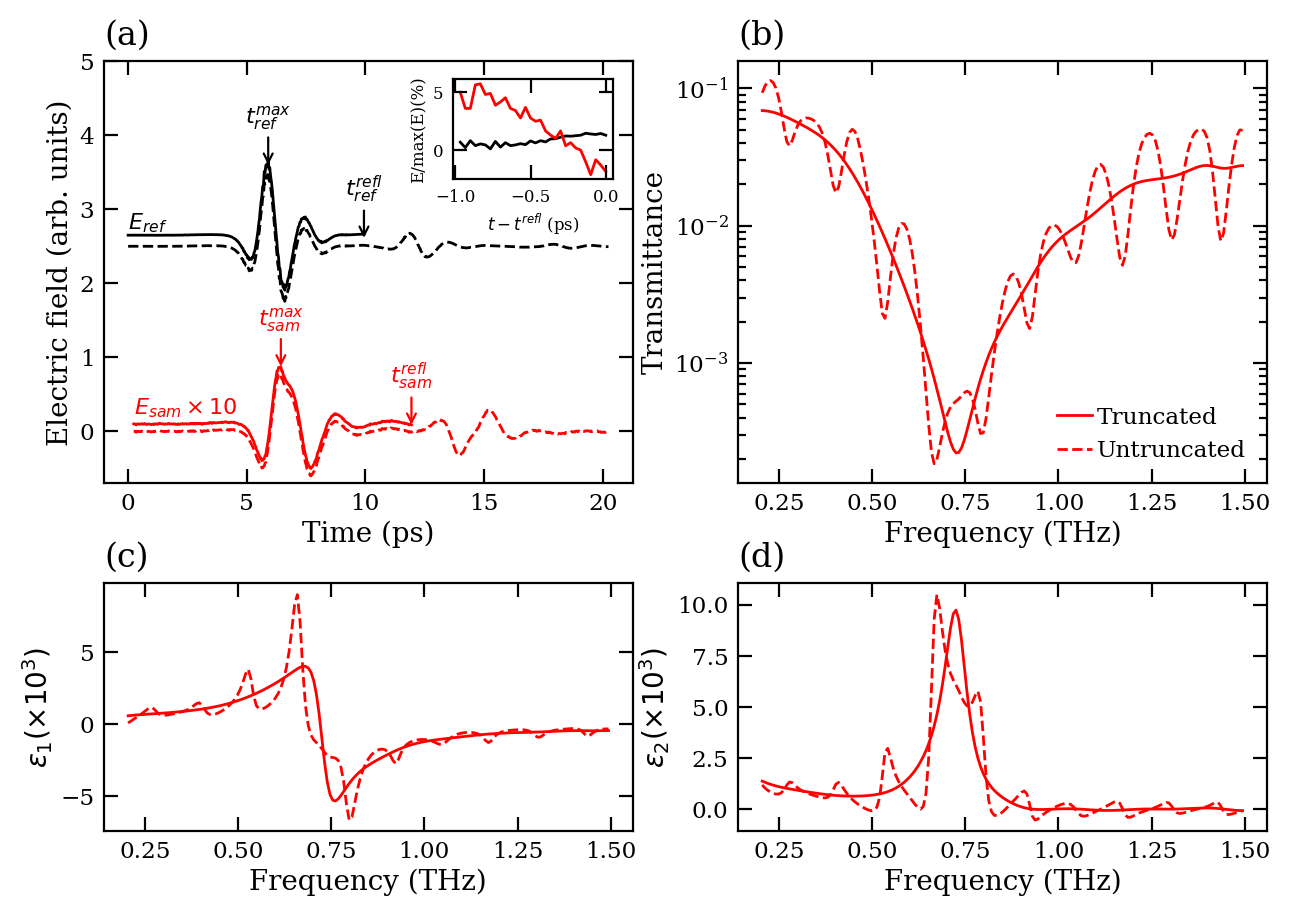

In [12]:
# Parámetros
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

left, right_sample, right_subs, index, correc_subs, desv = 380, 392, 390, 6, -0.028, 100
# Cambia la línea de creación de subplots para usar height_ratios
f, axs = plt.subplots(2, 2, figsize=(7.5, 5), dpi=200, 
                      gridspec_kw={'hspace': 0.3, 'height_ratios': [1.7, 1]})
N = 2**12

# Paths
path_signal = os.path.join(path_analisis, archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref, archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]

# Ventanas
# phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,
#                                                                               path_ref, 
#                                                                               left, 
#                                                                               right_sample,
#                                                                                 right_subs, 
#                                                                                 params_window)
# Datos sin ventana
x, y = getFilterdata(path_signal, right_sample, left)
x_ref, y_ref = getFilterdata(path_ref, right_subs, left)

a1 = right_sample #- x.iloc[len(x)//2]
a2 = right_subs #- x_ref.iloc[len(x_ref)//2]
x = x #- x.iloc[len(x)//2]
x_ref = x_ref #- x_ref.iloc[len(x_ref)//2]

# --- Subplot (a) ---
ax = axs[0, 0]
val = 2.2
retard = 386

# Traslación: llevar mínimo de x y x_ref a cero (ajustado por 'retard')
min_x_global = min((x - retard).min(), (x_ref - retard).min())
x -= (retard + min_x_global)
x_ref -= (retard + min_x_global)

# --- Subplot (a) ---
ax = axs[0, 0]
val = 2.5

arrow_props = dict(
    arrowstyle="->,head_length=0.4,head_width=0.2",
    linewidth=0.8,
    shrinkA=0,
    shrinkB=0
)

# Señal de referencia
sub = 0.15
line_ref, = ax.plot(x_ref, y_ref/max(y_ref)+val+sub , color='black')
ax.text(
    x_ref.iloc[0],                          
    y_ref.iloc[0]/max(y_ref)+val+0.01+sub,         
    '$E_{ref}$', color='black', fontsize=8, va='bottom'   
)

# Anotaciones con flechas
max_ref_idx = np.argmax(y_ref)
ax.annotate('$t^{max}_{ref}$', 
            xy=(x_ref.iloc[max_ref_idx], y_ref.iloc[max_ref_idx]/max(y_ref) + val + 0.1),
            xytext=(0, 15),
            textcoords='offset points',
            ha='center',
            arrowprops=dict(**arrow_props, facecolor='black', edgecolor='black'),
            fontsize=8,
            color='black')

end_ref_idx = -1
ax.annotate('$t^{refl}_{ref}$', 
            xy=(x_ref.iloc[end_ref_idx], y_ref.iloc[end_ref_idx]/max(y_ref) + val + 0.1),
            xytext=(0, 15),
            textcoords='offset points',
            ha='center',
            arrowprops=dict(**arrow_props, facecolor='black', edgecolor='black'),
            fontsize=8,
            color='black')

# Segunda señal de referencia
right_sample_proof = right_sample + 25
x_ref2, y_ref2 = getFilterdata(path_ref, right_sample_proof, left)
x_ref2 -= (retard + min_x_global)
ax.plot(x_ref2, y_ref2/max(y_ref2)+val ,'--k')

# Señal de muestra
factor = 10
line_sam, = ax.plot(x, y/max(y_ref)*factor+0.1, 'r')
ax.text(
    x[0], (y[0] / max(y_ref)) * factor+0.01+0.15, r'$E_{sam} \times 10$', color='r', fontsize=8, va='bottom'
)

# Anotaciones para muestra
max_sam_idx = np.argmax(y)
ax.annotate('$t^{max}_{sam}$', 
            xy=(x.iloc[max_sam_idx], y.iloc[max_sam_idx]/max(y_ref)*factor + 0.1),
            xytext=(0, 15),
            textcoords='offset points',
            ha='center',
            arrowprops=dict(**arrow_props, facecolor='red', edgecolor='red'),
            fontsize=8,
            color='red')

end_sam_idx = -1
ax.annotate('$t^{refl}_{sam}$',
            xy=(x.iloc[end_sam_idx], y.iloc[end_sam_idx]/max(y_ref)*factor + 0.1),
            xytext=(0, 15),
            textcoords='offset points',
            ha='center',
            arrowprops=dict(**arrow_props, facecolor='red', edgecolor='red'),
            fontsize=8,
            color='red')

# Segunda señal de muestra
x2, y2 = getFilterdata(path_signal, right_sample_proof, left)
x2 -= (retard + min_x_global)
ax.plot(x2, y2/max(y_ref)*factor ,'--r')

# Configuración de ejes
ax.set_xlabel('Time (ps)')
ax.set_ylabel('Electric field (arb. units)')
ax.set_title('(a)', loc='left')
ax.set_ylim(-0.7,5)

# ax.axvline(x=a1-retard, color='r', linestyle='-.', label='$t^{refl}_{samp}$')
# ax.axvline(x=a2-retard, color='gray', linestyle=':', label='$t^{refl}_{ref}$')
# ax.legend(loc='upper right')

# --- Crear el inset ---
# --- Crear el inset ---
inset = inset_axes(ax, 
                   width=0.8,  # en pulgadas
                   height=0.5, 
                   loc='upper right',
                   bbox_to_anchor=(-0.015, -0.015, 1, 1),  # x0, y0, width, height del anchor
                   bbox_transform=ax.transAxes, 
                   borderpad=0.5)

# 1. Normalizar por sus propios máximos y ajustar tiempo relativo al último punto
# Señal de referencia (negra)
max_ref = max(y_ref)  
last_time_ref = x_ref.iloc[-1]  # Tiempo del último punto

inset_ref_x = x_ref - last_time_ref  # Restamos el tiempo del último punto
inset_ref_y = y_ref / max_ref       # Normalizamos por su máximo

# Señal de muestra (roja)
max_sam = max(y)      
last_time_sam = x.iloc[-1]  # Tiempo del último punto

inset_sam_x = x - last_time_sam  # Restamos el tiempo del último punto
inset_sam_y = y / max_sam       # Normalizamos por su máximo

# 2. Graficar solo los últimos N puntos (ajusta según necesidad)
n_points = 30 # Puntos a mostrar en el inset

# Graficar (usamos los mismos estilos que en el gráfico principal)
inset.plot(inset_ref_x.iloc[-n_points:], 
           inset_ref_y.iloc[-n_points:]*100,  # +0.1 para separación visual
           color='black')

inset.plot(inset_sam_x.iloc[-n_points:], 
           inset_sam_y.iloc[-n_points:]*100, 
           color='red')

# 3. Añadir leyenda y ajustar ejes
inset.legend(fontsize=6, framealpha=0.5)
inset.set_xlabel('$t-t^{refl}$ (ps)', fontsize=6)  # Cambiado para reflejar la referencia
inset.set_ylabel('E/max(E)(%)', fontsize=6)
inset.tick_params(labelsize=6)

# --- FFT ---
k = 15
nu = sp.fft.fftfreq(N, 1/30)


fft_y_signal_ventaneada = FourierT2(y, N)[1:len(nu)//k]
fft_y_subs_ventaneada = FourierT2(y_ref, N)[1:len(nu)//k]

fft_y_signal = FourierT2(y2, N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_ref2, N)[1:len(nu)//k]
# fft_window = FourierT2(pd.Series(ventana), N)[1:len(nu)//k]

nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
fft_y_signal = fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
# fft_window = fft_window[mask]

global delta_ls_corr
delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada / fft_y_subs_ventaneada) * np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
T = (fft_y_signal / fft_y_subs) * np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

# --- Subplot (b) ---
ax = axs[0, 1]
ax.plot(nu_filtradas, np.abs(T_ventana)**2, 'r', label='Truncated')
ax.plot(nu_filtradas, np.abs(T)**2, '--r', label='Untruncated')
ax.set_ylabel(r'Transmittance')
ax.set_yscale('log')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(b)', loc='left')
ax.legend(loc='lower right')

# --- Subplot (c) ---
ax = axs[1, 0]
ax.plot(nu_filtradas, np.real(ep_con)*1e-3, 'r', label='Without window')
ax.plot(nu_filtradas, np.real(ep_sin)*1e-3, '--r', label='Rectangle window')
ax.set_ylabel(r'$\epsilon_1 (\times 10^{3})$')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(c)', loc='left')

# --- Subplot (d) ---
ax = axs[1, 1]
ax.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'r', label='Without window')
ax.plot(nu_filtradas, np.imag(ep_sin)*1e-3, '--r', label='Rectangle window')
ax.set_xlabel(r'Frequency (THz)')
ax.set_ylabel(r'$\epsilon_2 (\times 10^{3})$')
ax.set_title('(d)', loc='left')

# Ajustar espacio entre subplots
# plt.subplots_adjust(hspace=0, wspace=0)
plt.tight_layout()

# Guardar y mostrar
plt.savefig("fig2.jpg", dpi=1200, bbox_inches='tight', format='jpg')
plt.show()

# PbTe 10 K

C:\Users\esteb\AppData\Local\Temp\ipykernel_32396\3906478172.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\esteb\AppData\Local\Temp\ipykernel_32396\3906478172.py:214: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


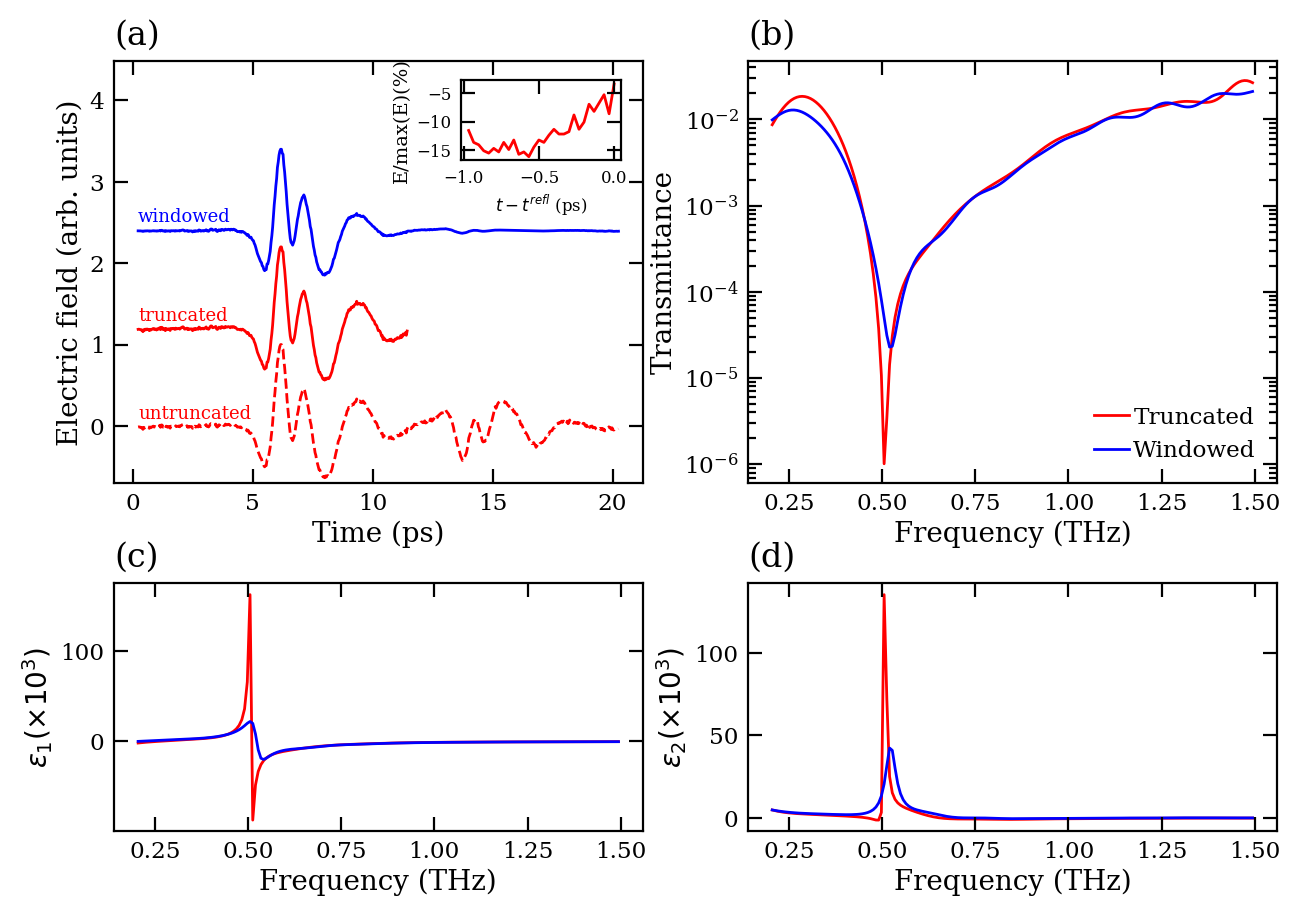

In [14]:
# Parámetros
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal.windows import gaussian

left, right_sample, right_subs, index, correc_subs, desv = 380, 391.5, 390, 0, -0.028, 100
# Cambia la línea de creación de subplots para usar height_ratios
f, axs = plt.subplots(2, 2, figsize=(7.5, 5), dpi=200, 
                      gridspec_kw={'hspace': 0.3, 'height_ratios': [1.7, 1]})
N = 2**12

# Paths
path_signal = os.path.join(path_analisis, archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref, archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]

# Ventanas

# Datos sin ventana
x, y_rect = getFilterdata(path_signal, right_sample, left)
x_ref, y_ref_rect = getFilterdata(path_ref, right_subs, left)

a1 = right_sample #- x.iloc[len(x)//2]
a2 = right_subs #- x_ref.iloc[len(x_ref)//2]
x = x #- x.iloc[len(x)//2]
x_ref = x_ref #- x_ref.iloc[len(x_ref)//2]

# --- Subplot (a) ---
ax = axs[0, 0]

val = 2.2
retard = 386

min_x_global = min((x - retard).min(), (x_ref - retard).min())
x -= (retard + min_x_global)
x_ref -= (retard + min_x_global)

# --- Subplot (a) ---
ax = axs[0, 0]
val = 2.2

# Segunda señal de referencia (NO usada en inset)
right_sample_proof = right_sample + 25
x_ref2, y_ref2 = getFilterdata(path_ref, right_sample_proof, left)
x_ref2 -= (retard + min_x_global)
# ax.plot(x_ref2, y_ref2/max(y_ref2)+val ,'--k')

# Segunda señal de muestra (línea punteada roja: untruncated)
x2, y2 = getFilterdata(path_signal, right_sample_proof, left)
x2 -= (retard + min_x_global)

factor = 1

y2 = y2/max(y2)
line_untrunc, = ax.plot(x2, y2*factor ,'--r')

# Señal truncada: línea roja sólida

y_rect = y_rect/max(y_rect)
val_rec = 1.2 * max(y2)
line_sam, = ax.plot(x, y_rect + val_rec, 'r')

# Ventaneado: línea azul sólida
x_vent, y_vent = getFilterdata(path_signal, right_sample_proof, left)

# Convertir a arrays
xv = x_vent.values.copy()
yv = y_vent.values.copy()

# Encontrar el índice del máximo de la señal
idx_max = np.argmax(yv)

# Crear ventana gaussiana centrada en cero
std = 100
gauss_win = gaussian(M=len(yv), std=std)

# Desplazar la ventana para alinear el máximo
shift = idx_max - len(yv) // 2
gauss_win_shifted = np.roll(gauss_win, shift)

# Eje x ajustado
xv -= (retard + min_x_global)

# Aplicar ventana
y_windowed = yv * gauss_win_shifted
y_windowed = y_windowed/max(y_windowed)
# Graficar
line_win, = ax.plot(xv, y_windowed + val_rec*2, 'b')

# Etiquetas de texto al inicio de cada curva
# (usamos el primer punto visible de cada curva para ubicar la etiqueta)
ax.text(x2.iloc[0], (y2.iloc[0]*(factor-4)), 'untruncated', color='r', fontsize=6.5, va='bottom')
ax.text(x.iloc[0], (y_rect.iloc[0] + val_rec*(1+0.05)), 'truncated', color='r', fontsize=6.5, va='bottom')
ax.text(xv[0], (y_windowed[0] + val_rec*(2+0.05)), 'windowed', color='b', fontsize=6.5, va='bottom')

# Configuración de ejes
ax.set_xlabel('Time (ps)')
ax.set_ylabel('Electric field (arb. units)')
ax.set_title('(a)', loc='left')
ax.set_ylim(min(y2*factor*(1+0.1)),max(y_windowed + val_rec*(2+0.9)))


# --- Crear el inset ---
inset = inset_axes(
    ax,
    width=0.8,
    height=0.4,
    loc='upper right',
    bbox_to_anchor=(-0.04, -0.045, 1, 1),  # x0, y0, width, height
    bbox_transform=ax.transAxes,
    borderpad=0
)


# 1. Extraer últimos puntos visibles para las 3 curvas relevantes
n_points = 30

# Línea punteada roja (untruncated)
# inset.plot(x2.iloc[-n_points:] - x2.iloc[-1], 
#            y2.iloc[-n_points:] / max(y2) * 100, 
#            '--r')

# Línea roja sólida (truncated)
inset.plot(x.iloc[-n_points:] - x.iloc[-1], 
           y_rect.iloc[-n_points:] / max(y_rect) * 100, 
           'r')

# Línea azul sólida (windowed)
xv_last = xv[-n_points:] - xv[-1]
yw_last = y_windowed[-n_points:] / max(y_windowed) * 100
# inset.plot(xv_last, yw_last, 'b')

# 2. Configuración del inset
# inset.legend(['untruncated', 'truncated', 'windowed'], fontsize=2, framealpha=0.5)
inset.set_xlabel('$t-t^{refl}$ (ps)', fontsize=6)
inset.set_ylabel('E/max(E)(%)', fontsize=7)
inset.tick_params(labelsize=6)

# 4. Opcional: Resaltar el origen (t=0 es el último punto)
# inset.axvline(0, color='gray', linestyle=':', linewidth=0.5)

# 5. Añadir recuadro de zoom en el gráfico principal
# ax.indicate_inset_zoom(inset, edgecolor="gray")

nk0 = left
nk1 = right_sample_proof
nk2 = right_sample_proof
phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,nk0,nk1,nk2,params_window)

y_subs_ventana = pd.Series(y_substrate_padding*ventana)
y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

# --- FFT ---
k = 15
nu = sp.fft.fftfreq(N, 1/30)

fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]

x, y_rect = getFilterdata(path_signal, right_sample, left)
x_ref, y_ref_rect = getFilterdata(path_ref, right_subs, left)
fft_y_signal = FourierT2(y_rect, N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_ref_rect, N)[1:len(nu)//k]
# fft_window = FourierT2(pd.Series(ventana), N)[1:len(nu)//k]

nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
fft_y_signal = fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
# fft_window = fft_window[mask]

global delta_ls_corr
delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
T = (fft_y_signal / fft_y_subs) * np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

# --- Subplot (b) ---
ax = axs[0, 1]
ax.plot(nu_filtradas, np.abs(T)**2, 'r', label='Truncated')
ax.plot(nu_filtradas, np.abs(T_ventana)**2, 'b', label='Windowed')

ax.set_ylabel(r'Transmittance')
ax.set_yscale('log')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(b)', loc='left')
ax.legend(loc='lower right')

# --- Subplot (c) ---
ax = axs[1, 0]
ax.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r')
ax.plot(nu_filtradas, np.real(ep_con)*1e-3, 'b')
# ax.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r')
ax.set_ylabel(r'$\epsilon_1(\times 10^{3})$')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(c)', loc='left')

# --- Subplot (d) ---
ax = axs[1, 1]
ax.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r')
ax.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'b')
# ax.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r')
ax.set_xlabel(r'Frequency (THz)')
ax.set_ylabel(r'$\epsilon_2(\times 10^{3})$')
ax.set_title('(d)', loc='left')

# Ajustar espacio entre subplots
# plt.subplots_adjust(hspace=0, wspace=0)
plt.tight_layout()

# Guardar y mostrar
plt.savefig("fig3.jpg", dpi=1200, bbox_inches='tight', format='jpg')
plt.show()

# plot 3

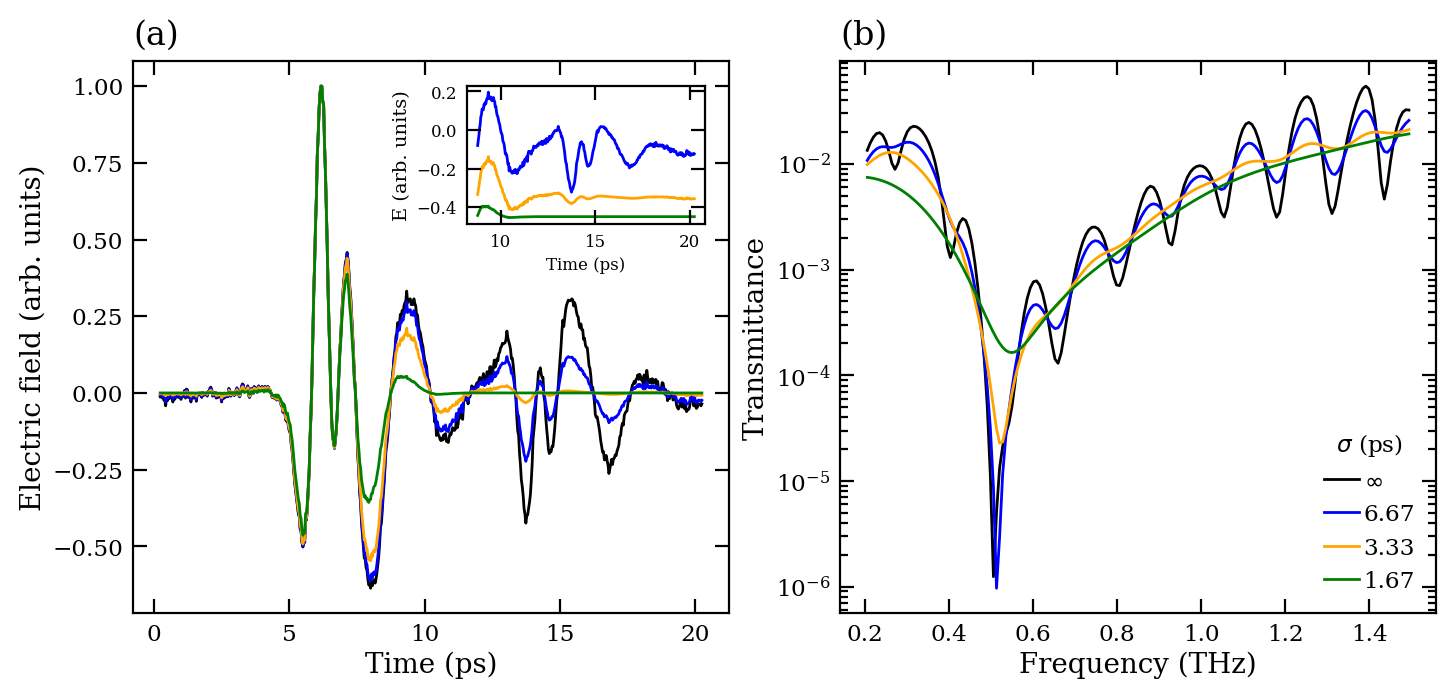

In [18]:
# Parámetros
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal.windows import gaussian

left, right_sample, right_subs, index, correc_subs, desv = 380, 391.5, 390, 0, -0.028, 100
# Cambia la línea de creación de subplots para usar height_ratios
f, axs = plt.subplots(1, 2, figsize=(7.1, 2*5/3), dpi=200)
N = 2**12
std = [1000000,200,100,50]
colors = ['black',
          'blue',
          'orange',
          'green']
desv2 = [6.67,3.33,1.67]
sign = []
# Paths
path_signal = os.path.join(path_analisis, archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref, archivos_ordenados_ref[int(index)])
x_vent, y_vent = getFilterdata(path_signal, right_sample_proof, left)

for j,desv in enumerate(std):

    params_window = ['gaussian', 
                    desv]

    # Ventanas

    val = 2.2
    retard = 386

    # --- Subplot (a) ---
    ax = axs[0]
    val = 2.2

    # Segunda señal de referencia (NO usada en inset)
    right_sample_proof = right_sample + 25

    # Convertir a arrays
    xv = x_vent.values.copy()
    yv = y_vent.values.copy()

    # Encontrar el índice del máximo de la señal
    idx_max = np.argmax(yv)

    # Crear ventana gaussiana centrada en cero
    # print(desv)
    gauss_win = gaussian(M=len(yv), std=desv)

    # Desplazar la ventana para alinear el máximo
    shift = idx_max - len(yv) // 2
    gauss_win_shifted = np.roll(gauss_win, shift)

    # Eje x ajustado
    xv -= (retard + min_x_global)

    # Aplicar ventana
    y_windowed = yv * gauss_win_shifted

    # Graficar
    y_windowed = y_windowed/max(y_windowed)
    line_win, = ax.plot(xv, y_windowed,color = colors[j])

    # Configuración de ejes
    ax.set_xlabel('Time (ps)')
    ax.set_ylabel('Electric field (arb. units)')
    ax.set_title('(a)', loc='left')
    # ax.set_ylim(min(y2*factor*(1+0.1)),max(y_windowed + val_rec*(2+0.4)))

    # --- Crear el inset ---
    


    # 1. Extraer últimos puntos visibles para las 3 curvas relevantes
    n_points = 345


    # Línea azul sólida (windowed)
    xv_last = xv[-n_points:] 
    yw_last = y_windowed[-n_points:] 

    sign.append([xv_last,yw_last])

    if j == len(std)-1:
        inset = inset_axes(
        ax,
        width="40%",
        height="25%",
        loc='upper right',
        bbox_to_anchor=(-0.04, -0.045, 1, 1),  # x0, y0, width, height
        bbox_transform=ax.transAxes,
        borderpad=0
    )
    
        ccc = 0
        offset = [0.1, 0.35, 0.45]
        for i,sign in enumerate(sign):
            # inset.plot(sign[0], sign[1],color = colors[j])
            if i!=0:
                inset.plot(sign[0], sign[1]-offset[ccc], color = colors[i])
                ccc+=1

            # 2. Configuración del inset
            # inset.legend(['untruncated', 'truncated', 'windowed'], fontsize=2, framealpha=0.5)
            inset.set_xlabel('Time (ps)', fontsize=6)
            inset.set_ylabel('E (arb. units)', fontsize=7)
            inset.tick_params(labelsize=6)

    # 4. Opcional: Resaltar el origen (t=0 es el último punto)
    # inset.axvline(0, color='gray', linestyle=':', linewidth=0.5)

    # 5. Añadir recuadro de zoom en el gráfico principal
    # ax.indicate_inset_zoom(inset, edgecolor="gray")

    nk0 = left
    nk1 = right_sample_proof
    nk2 = right_sample_proof
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,
                                                                                path_ref,
                                                                                nk0,
                                                                                nk1,
                                                                                nk2,
                                                                                params_window)

    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    # --- FFT ---
    k = 15
    nu = sp.fft.fftfreq(N, 1/30)

    fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]


    # fft_window = FourierT2(pd.Series(ventana), N)[1:len(nu)//k]

    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.5
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    # fft_window = fft_window[mask]

    global delta_ls_corr
    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)


    # --- Subplot (b) ---
    ax = axs[1]
    # ax.plot(nu_filtradas, np.abs(T)**2, 'r', label='Truncated')
    if j == 0:
        ax.plot(nu_filtradas, np.abs(T_ventana)**2,color=colors[j], label=f'$\infty$')
    else:
        ax.plot(nu_filtradas, np.abs(T_ventana)**2,color=colors[j], label=f'{desv2[j-1]}')

    ax.set_ylabel(r'Transmittance')
    ax.set_yscale('log')
    ax.set_xlabel(r'Frequency (THz)')
    ax.set_title('(b)', loc='left')
    ax.legend(title='$\sigma$ (ps)',loc='lower right')

    # Guardar y mostrar
    plt.savefig("fig4.jpg", dpi=1200, bbox_inches='tight', format='jpg')
    # plt.show()

# plot4

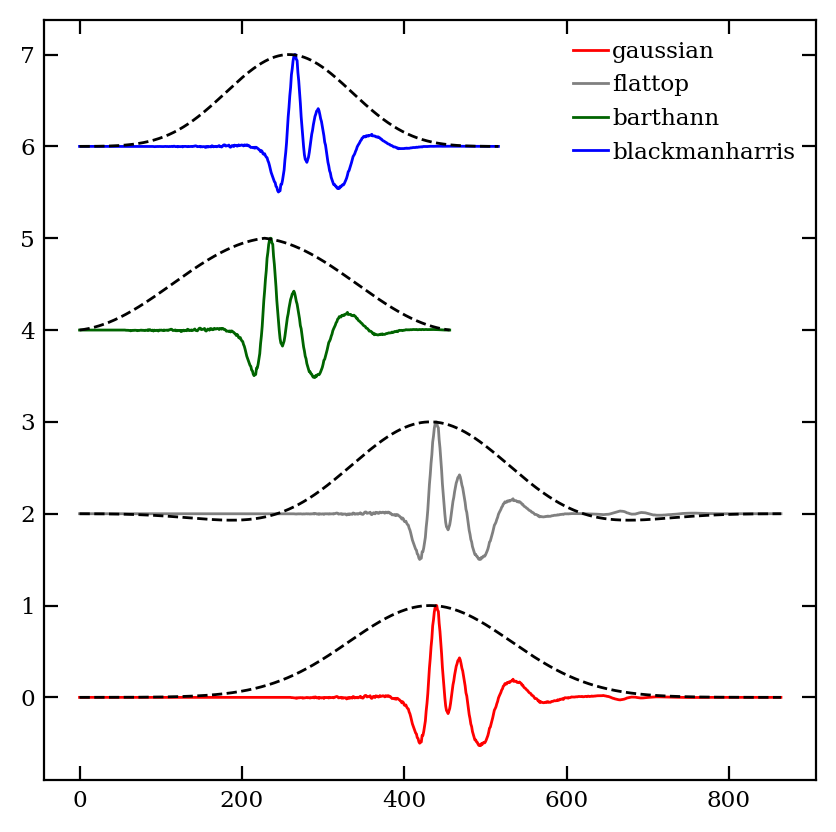

In [15]:
f, axs = plt.subplots(1, 1, figsize=(4, 4), dpi=200)#, 
                     # gridspec_kw={'hspace': 0, 'height_ratios': [1, 1]})


N = 2**12
n = 2.6
left, right_sample, right_subs, index, correc_subs, desv = 380, 391.5, 390, 0, -0.028, 100
path_signal = os.path.join(path_analisis, archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref, archivos_ordenados_ref[int(index)])
right_sample_proof = right_sample 
params_window1 = ['gaussian', desv]
params_window2 = ['flattop']
params_window3 = ['barthann']
params_window4 = ['blackmanharris']
ventanas = [params_window1,
            params_window2,
            params_window3,
            params_window4]
colors = ['red',
          'gray',
          'darkgreen',
          'blue']
names = [params_window1[0],
         params_window2[0],
         params_window3[0],
         params_window4[0]]

cortes = []
nk0 = left
nk1 = right_sample_proof
nk2 = right_sample_proof

cortes = [
    right_sample_proof+ 20,
    right_sample_proof+ 20,
    right_sample_proof+ 2,
    right_sample_proof+ 3
]

offset = 2
for count,j in enumerate(ventanas):
    N = 2**12
    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
    xmin, xmax = 0.2, 1.5

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,
                                                                                 path_ref,
                                                                                 nk0,
                                                                                 cortes[count],
                                                                                 cortes[count],
                                                                                 j)

    y_subs_ventana = pd.Series(y_signal_ventaneada*ventana)


    ax = axs
    ax.plot(y_subs_ventana/max(y_subs_ventana)+offset*count,label = f'{names[count]}',color=colors[count])
    ax.plot(ventana/max(ventana)+offset*count, '--k')
    # ax.plot( y_substrate_padding*ventana/max(y_substrate_padding*ventana)-offset*(count+1), 'k')
    # ax.plot(nu_filtradas, np.real(ep_con)*1e-3,color=colors[count], label = f'{names[count]}')
    # ax.set_ylabel(r'$\epsilon_1\times 10^{-3}$')
    # ax.set_xlabel(r'Frequency (THz)')
    # ax.set_title('(c)', loc='left')
    ax.legend()

    # ax = axs[1, 1]
    # ax.plot(nu_filtradas, np.imag(ep_con)*1e-3,color=colors[count], label = f'{names[count]}')
    # ax.set_ylabel(r'$\epsilon_2\times 10^{-3}$')
    # ax.set_xlabel(r'Frequency (THz)')
    # ax.set_title('(d)', loc='left')
    # ax.legend()

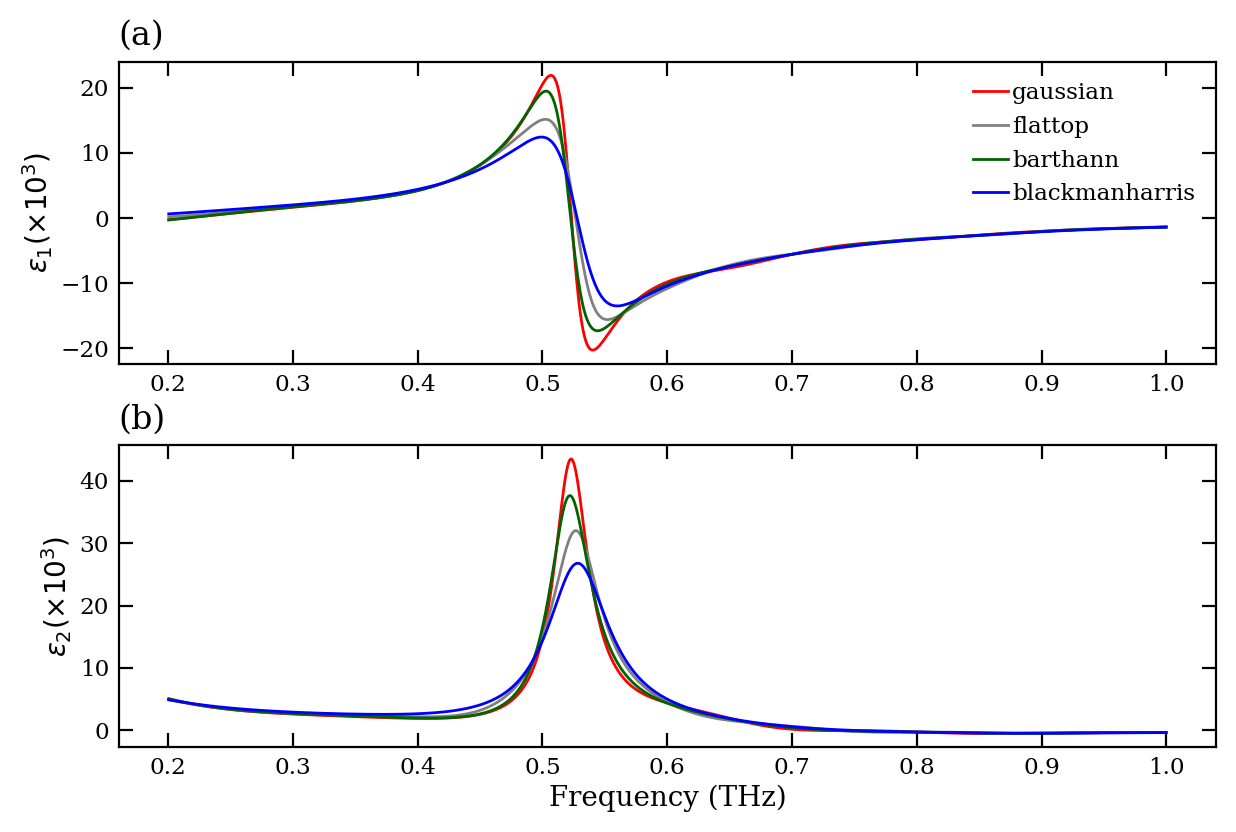

In [17]:
N = 2**12
n = 2.6

left, right_sample, right_subs, index, correc_subs, desv = 380, 391.5, 390, 0, -0.028, 100
path_signal = os.path.join(path_analisis, archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref, archivos_ordenados_ref[int(index)])
right_sample_proof = right_sample + 25
params_window1 = ['gaussian', desv]
params_window2 = ['flattop']
params_window3 = ['barthann']
params_window4 = ['blackmanharris']
ventanas = [params_window1,
            params_window2,
            params_window3,
            params_window4]
colors = ['red',
          'gray',
          'darkgreen',
          'blue']
names = [params_window1[0],
         params_window2[0],
         params_window3[0],
         params_window4[0]]
nk0 = left
f, axs = plt.subplots(2, 1, figsize=(6, 4), dpi=200, 
                      gridspec_kw={'hspace': -0.3})

# Crear el inset en axs[1]
# inset = inset_axes(
#     axs[1],
#     width="40%",  # porcentaje del tamaño del eje padre
#     height="30%", 
#     loc='upper right', 
#     bbox_to_anchor=(-0.04, -0.05, 1, 1),
#     bbox_transform=axs[1].transAxes,
#     borderpad=0
# )
for count,j in enumerate(ventanas):
    N = 2**15
    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
    xmin, xmax = 0.2, 1.0

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,
                                                                                 path_ref,
                                                                                 nk0,
                                                                                 cortes[count],
                                                                                 cortes[count],
                                                                                 j)

    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)
        # --- FFT ---

    fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]
    nu = nu[1:len(nu)//k]

    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ax = axs[0]
    ax.plot(nu_filtradas, np.real(ep_con)*1e-3,color=colors[count], label = f'{names[count]}')
    ax.set_ylabel(r'$\epsilon_1(\times 10^{3})$')
    #ax.set_xlabel(r'Frequency (THz)')
    ax.set_title('(a)', loc='left')
    ax.legend()

    ax = axs[1]
    ax.plot(nu_filtradas, np.imag(ep_con)*1e-3,color=colors[count], label = f'{names[count]}')
    ax.set_ylabel(r'$\epsilon_2(\times 10^{3})$')
    ax.set_xlabel(r'Frequency (THz)')
    ax.set_title('(b)', loc='left')

    # # Filtro para inset: solo entre 0.4 y 0.6 THz
    # inset_mask = (nu_filtradas >= 0.6) & (nu_filtradas <= 0.7)
    # inset.plot(
    #     nu_filtradas[inset_mask],
    #     np.imag(ep_con[inset_mask]) * 1e-3,
    #     color=colors[count]
    # )
    # ax.legend()

plt.savefig("fig5.jpg", dpi=1200, bbox_inches='tight', format='jpg')

C:\Users\esteb\AppData\Local\Temp\ipykernel_3636\3203486242.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\esteb\AppData\Local\Temp\ipykernel_3636\3203486242.py:201: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


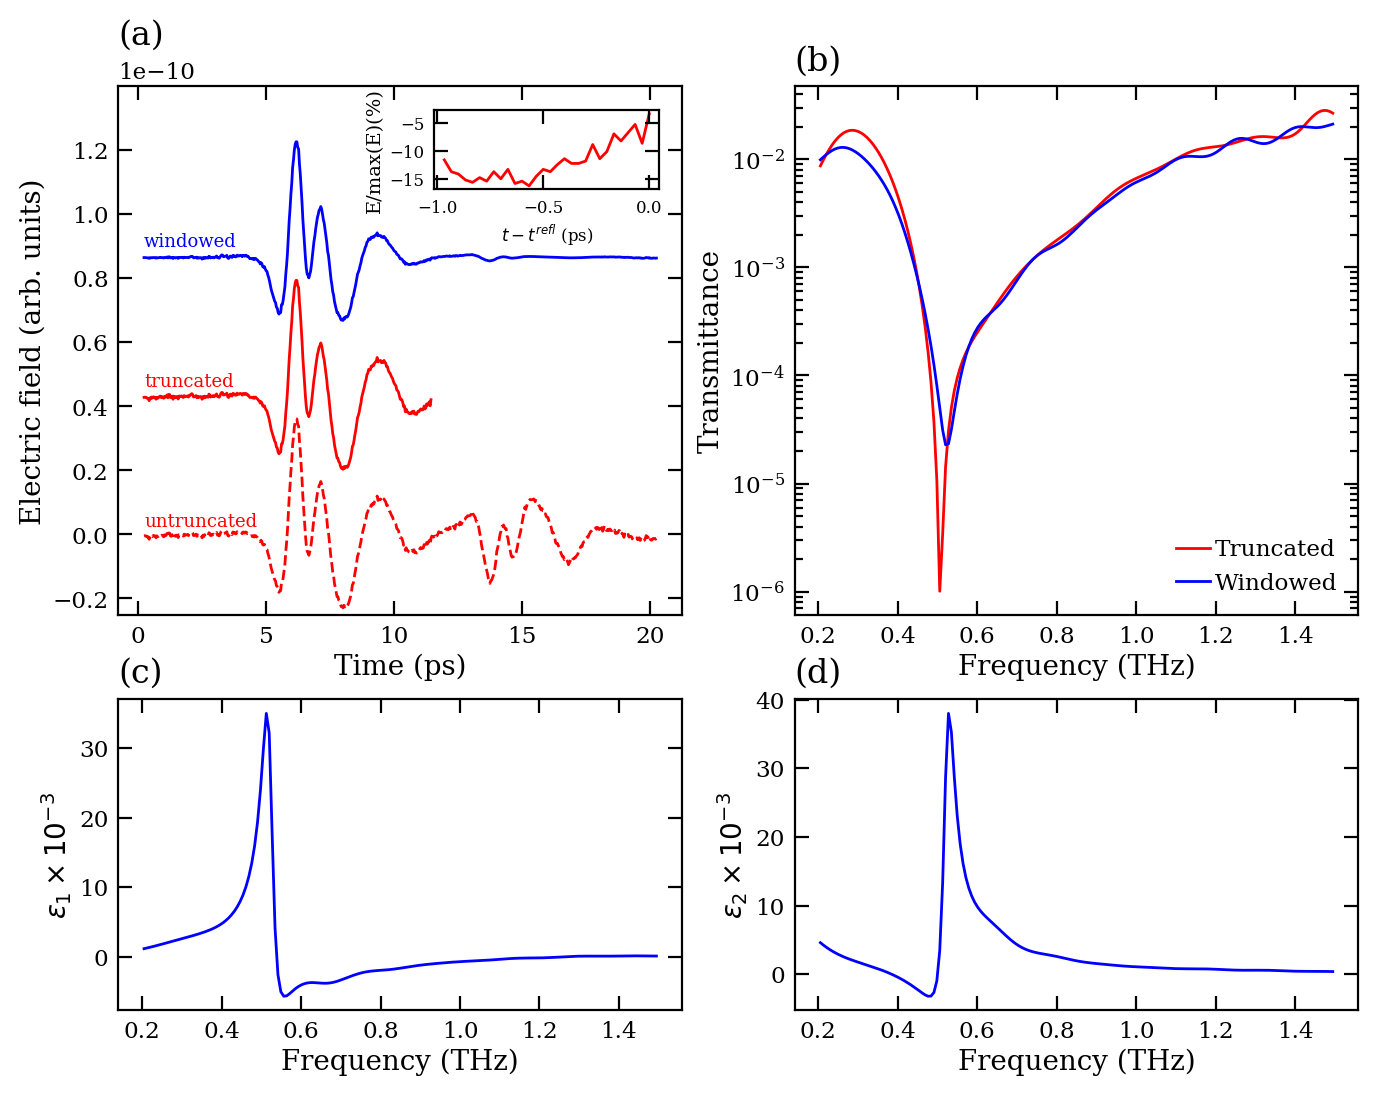

In [14]:
# Parámetros
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal.windows import gaussian

left, right_sample, right_subs, index, correc_subs, desv = 380, 391.5, 390, 0, -0.028, 100
# Cambia la línea de creación de subplots para usar height_ratios
f, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=200, 
                      gridspec_kw={'hspace': 0.2, 'height_ratios': [1.7, 1]})
N = 2**12

# Paths
path_signal = os.path.join(path_analisis, archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref, archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]


a1 = right_sample #- x.iloc[len(x)//2]
a2 = right_subs #- x_ref.iloc[len(x_ref)//2]
x = x #- x.iloc[len(x)//2]
x_ref = x_ref #- x_ref.iloc[len(x_ref)//2]

# --- Subplot (a) ---
ax = axs[0, 0]

val = 2.2
retard = 386

min_x_global = min((x - retard).min(), (x_ref - retard).min())
x -= (retard + min_x_global)
x_ref -= (retard + min_x_global)

# --- Subplot (a) ---
ax = axs[0, 0]
val = 2.2

# Segunda señal de referencia (NO usada en inset)
right_sample_proof = right_sample + 25
x_ref2, y_ref2 = getFilterdata(path_ref, right_sample_proof, left)
x_ref2 -= (retard + min_x_global)
# ax.plot(x_ref2, y_ref2/max(y_ref2)+val ,'--k')

# Segunda señal de muestra (línea punteada roja: untruncated)
x2, y2 = getFilterdata(path_signal, right_sample_proof, left)
x2 -= (retard + min_x_global)

factor = 1
line_untrunc, = ax.plot(x2, y2*factor ,'--r')

# Señal truncada: línea roja sólida

val_rec = 1.2 * max(y2)
line_sam, = ax.plot(x, y_rect + val_rec, 'r')

# Ventaneado: línea azul sólida
x_vent, y_vent = getFilterdata(path_signal, right_sample_proof, left)

# Convertir a arrays
xv = x_vent.values.copy()
yv = y_vent.values.copy()

# Encontrar el índice del máximo de la señal
idx_max = np.argmax(yv)

# Crear ventana gaussiana centrada en cero
std = 100
gauss_win = gaussian(M=len(yv), std=std)

# Desplazar la ventana para alinear el máximo
shift = idx_max - len(yv) // 2
gauss_win_shifted = np.roll(gauss_win, shift)

# Eje x ajustado
xv -= (retard + min_x_global)

# Aplicar ventana
y_windowed = yv * gauss_win_shifted

# Graficar
line_win, = ax.plot(xv, y_windowed + val_rec*2, 'b')

# Etiquetas de texto al inicio de cada curva
# (usamos el primer punto visible de cada curva para ubicar la etiqueta)
ax.text(x2.iloc[0], (y2.iloc[0]*(factor-4)), 'untruncated', color='r', fontsize=6.5, va='bottom')
ax.text(x.iloc[0], (y_rect.iloc[0] + val_rec*(1+0.05)), 'truncated', color='r', fontsize=6.5, va='bottom')
ax.text(xv[0], (y_windowed[0] + val_rec*(2+0.05)), 'windowed', color='b', fontsize=6.5, va='bottom')

# Configuración de ejes
ax.set_xlabel('Time (ps)')
ax.set_ylabel('Electric field (arb. units)')
ax.set_title('(a)', loc='left')
ax.set_ylim(min(y2*factor*(1+0.1)),max(y_windowed + val_rec*(2+0.4)))

# --- Crear el inset ---
inset = inset_axes(
    ax,
    width="40%",
    height="15%",
    loc='upper right',
    bbox_to_anchor=(-0.04, -0.045, 1, 1),  # x0, y0, width, height
    bbox_transform=ax.transAxes,
    borderpad=0
)


# 1. Extraer últimos puntos visibles para las 3 curvas relevantes
n_points = 30

# Línea punteada roja (untruncated)
# inset.plot(x2.iloc[-n_points:] - x2.iloc[-1], 
#            y2.iloc[-n_points:] / max(y2) * 100, 
#            '--r')

# Línea roja sólida (truncated)
inset.plot(x.iloc[-n_points:] - x.iloc[-1], 
           y_rect.iloc[-n_points:] / max(y_rect) * 100, 
           'r')

# Línea azul sólida (windowed)
xv_last = xv[-n_points:] - xv[-1]
yw_last = y_windowed[-n_points:] / max(y_windowed) * 100
# inset.plot(xv_last, yw_last, 'b')

# 2. Configuración del inset
# inset.legend(['untruncated', 'truncated', 'windowed'], fontsize=2, framealpha=0.5)
inset.set_xlabel('$t-t^{refl}$ (ps)', fontsize=6)
inset.set_ylabel('E/max(E)(%)', fontsize=7)
inset.tick_params(labelsize=6)

# 4. Opcional: Resaltar el origen (t=0 es el último punto)
# inset.axvline(0, color='gray', linestyle=':', linewidth=0.5)

# 5. Añadir recuadro de zoom en el gráfico principal
# ax.indicate_inset_zoom(inset, edgecolor="gray")

nk0 = left
nk1 = right_sample_proof
nk2 = right_sample_proof
phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,nk0,nk1,nk2,params_window)

y_subs_ventana = pd.Series(y_substrate_padding*ventana)
y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

# --- FFT ---
k = 15
nu = sp.fft.fftfreq(N, 1/30)

fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]

fft_y_signal = FourierT2(y_rect, N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_ref_rect, N)[1:len(nu)//k]
# fft_window = FourierT2(pd.Series(ventana), N)[1:len(nu)//k]

nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
fft_y_signal = fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
# fft_window = fft_window[mask]

global delta_ls_corr
delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(-1j*2*np.pi*nu_filtradas*phase*1/30)
T = (fft_y_signal / fft_y_subs) * np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

# --- Subplot (b) ---
ax = axs[0, 1]
ax.plot(nu_filtradas, np.abs(T)**2, 'r', label='Truncated')
ax.plot(nu_filtradas, np.abs(T_ventana)**2, 'b', label='Windowed')

ax.set_ylabel(r'Transmittance')
ax.set_yscale('log')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(b)', loc='left')
ax.legend(loc='lower right')

# --- Subplot (c) ---
ax = axs[1, 0]
ax.plot(nu_filtradas, np.real(ep_con)*1e-3, 'b')
# ax.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r')
ax.set_ylabel(r'$\epsilon_1\times 10^{-3}$')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(c)', loc='left')

# --- Subplot (d) ---
ax = axs[1, 1]
ax.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'b')
# ax.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r')
ax.set_xlabel(r'Frequency (THz)')
ax.set_ylabel(r'$\epsilon_2\times 10^{-3}$')
ax.set_title('(d)', loc='left')

# Ajustar espacio entre subplots
# plt.subplots_adjust(hspace=0, wspace=0)
plt.tight_layout()


C:\Users\esteb\AppData\Local\Temp\ipykernel_3636\2772800618.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\esteb\AppData\Local\Temp\ipykernel_3636\2772800618.py:208: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


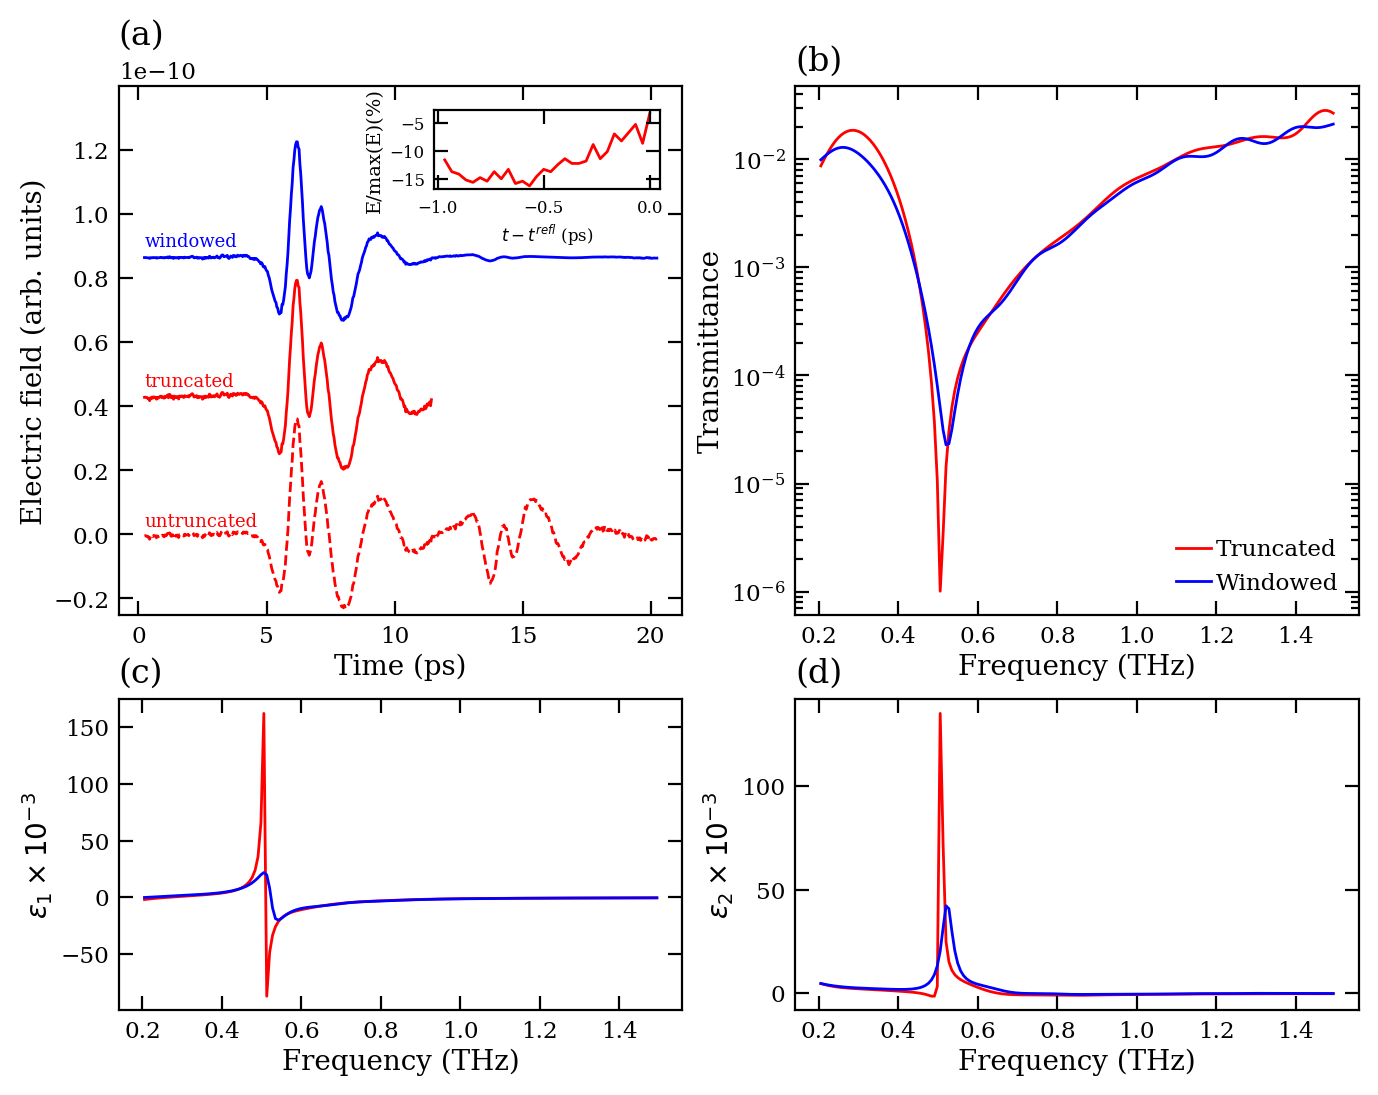

In [15]:
# Parámetros
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal.windows import gaussian

left, right_sample, right_subs, index, correc_subs, desv = 380, 391.5, 390, 0, -0.028, 100
# Cambia la línea de creación de subplots para usar height_ratios
f, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=200, 
                      gridspec_kw={'hspace': 0.2, 'height_ratios': [1.7, 1]})
N = 2**12

# Paths
path_signal = os.path.join(path_analisis, archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref, archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]

# Ventanas

# Datos sin ventana
x, y_rect = getFilterdata(path_signal, right_sample, left)
x_ref, y_ref_rect = getFilterdata(path_ref, right_subs, left)

a1 = right_sample #- x.iloc[len(x)//2]
a2 = right_subs #- x_ref.iloc[len(x_ref)//2]
x = x #- x.iloc[len(x)//2]
x_ref = x_ref #- x_ref.iloc[len(x_ref)//2]

# --- Subplot (a) ---
ax = axs[0, 0]

val = 2.2
retard = 386

min_x_global = min((x - retard).min(), (x_ref - retard).min())
x -= (retard + min_x_global)
x_ref -= (retard + min_x_global)

# --- Subplot (a) ---
ax = axs[0, 0]
val = 2.2

# Segunda señal de referencia (NO usada en inset)
right_sample_proof = right_sample + 25
x_ref2, y_ref2 = getFilterdata(path_ref, right_sample_proof, left)
x_ref2 -= (retard + min_x_global)
# ax.plot(x_ref2, y_ref2/max(y_ref2)+val ,'--k')

# Segunda señal de muestra (línea punteada roja: untruncated)
x2, y2 = getFilterdata(path_signal, right_sample_proof, left)
x2 -= (retard + min_x_global)

factor = 1
line_untrunc, = ax.plot(x2, y2*factor ,'--r')

# Señal truncada: línea roja sólida

val_rec = 1.2 * max(y2)
line_sam, = ax.plot(x, y_rect + val_rec, 'r')

# Ventaneado: línea azul sólida
x_vent, y_vent = getFilterdata(path_signal, right_sample_proof, left)

# Convertir a arrays
xv = x_vent.values.copy()
yv = y_vent.values.copy()

# Encontrar el índice del máximo de la señal
idx_max = np.argmax(yv)

# Crear ventana gaussiana centrada en cero
std = 100
gauss_win = gaussian(M=len(yv), std=std)

# Desplazar la ventana para alinear el máximo
shift = idx_max - len(yv) // 2
gauss_win_shifted = np.roll(gauss_win, shift)

# Eje x ajustado
xv -= (retard + min_x_global)

# Aplicar ventana
y_windowed = yv * gauss_win_shifted

# Graficar
line_win, = ax.plot(xv, y_windowed + val_rec*2, 'b')

# Etiquetas de texto al inicio de cada curva
# (usamos el primer punto visible de cada curva para ubicar la etiqueta)
ax.text(x2.iloc[0], (y2.iloc[0]*(factor-4)), 'untruncated', color='r', fontsize=6.5, va='bottom')
ax.text(x.iloc[0], (y_rect.iloc[0] + val_rec*(1+0.05)), 'truncated', color='r', fontsize=6.5, va='bottom')
ax.text(xv[0], (y_windowed[0] + val_rec*(2+0.05)), 'windowed', color='b', fontsize=6.5, va='bottom')

# Configuración de ejes
ax.set_xlabel('Time (ps)')
ax.set_ylabel('Electric field (arb. units)')
ax.set_title('(a)', loc='left')
ax.set_ylim(min(y2*factor*(1+0.1)),max(y_windowed + val_rec*(2+0.4)))

# --- Crear el inset ---
inset = inset_axes(
    ax,
    width="40%",
    height="15%",
    loc='upper right',
    bbox_to_anchor=(-0.04, -0.045, 1, 1),  # x0, y0, width, height
    bbox_transform=ax.transAxes,
    borderpad=0
)


# 1. Extraer últimos puntos visibles para las 3 curvas relevantes
n_points = 30

# Línea punteada roja (untruncated)
# inset.plot(x2.iloc[-n_points:] - x2.iloc[-1], 
#            y2.iloc[-n_points:] / max(y2) * 100, 
#            '--r')

# Línea roja sólida (truncated)
inset.plot(x.iloc[-n_points:] - x.iloc[-1], 
           y_rect.iloc[-n_points:] / max(y_rect) * 100, 
           'r')

# Línea azul sólida (windowed)
xv_last = xv[-n_points:] - xv[-1]
yw_last = y_windowed[-n_points:] / max(y_windowed) * 100
# inset.plot(xv_last, yw_last, 'b')

# 2. Configuración del inset
# inset.legend(['untruncated', 'truncated', 'windowed'], fontsize=2, framealpha=0.5)
inset.set_xlabel('$t-t^{refl}$ (ps)', fontsize=6)
inset.set_ylabel('E/max(E)(%)', fontsize=7)
inset.tick_params(labelsize=6)

# 4. Opcional: Resaltar el origen (t=0 es el último punto)
# inset.axvline(0, color='gray', linestyle=':', linewidth=0.5)

# 5. Añadir recuadro de zoom en el gráfico principal
# ax.indicate_inset_zoom(inset, edgecolor="gray")

nk0 = left
nk1 = right_sample_proof
nk2 = right_sample_proof
phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,nk0,nk1,nk2,params_window)

y_subs_ventana = pd.Series(y_substrate_padding*ventana)
y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

# --- FFT ---
k = 15
nu = sp.fft.fftfreq(N, 1/30)

fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]

fft_y_signal = FourierT2(y_rect, N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_ref_rect, N)[1:len(nu)//k]
# fft_window = FourierT2(pd.Series(ventana), N)[1:len(nu)//k]

nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
fft_y_signal = fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
# fft_window = fft_window[mask]

global delta_ls_corr
delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
T = (fft_y_signal / fft_y_subs) * np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

# --- Subplot (b) ---
ax = axs[0, 1]
ax.plot(nu_filtradas, np.abs(T)**2, 'r', label='Truncated')
ax.plot(nu_filtradas, np.abs(T_ventana)**2, 'b', label='Windowed')

ax.set_ylabel(r'Transmittance')
ax.set_yscale('log')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(b)', loc='left')
ax.legend(loc='lower right')

# --- Subplot (c) ---
ax = axs[1, 0]
ax.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r')
ax.plot(nu_filtradas, np.real(ep_con)*1e-3, 'b')
# ax.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r')
ax.set_ylabel(r'$\epsilon_1\times 10^{-3}$')
ax.set_xlabel(r'Frequency (THz)')
ax.set_title('(c)', loc='left')

# --- Subplot (d) ---
ax = axs[1, 1]
ax.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r')
ax.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'b')
# ax.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r')
ax.set_xlabel(r'Frequency (THz)')
ax.set_ylabel(r'$\epsilon_2\times 10^{-3}$')
ax.set_title('(d)', loc='left')

# Ajustar espacio entre subplots
# plt.subplots_adjust(hspace=0, wspace=0)
plt.tight_layout()

# Guardar y mostrar
plt.savefig("fig3.png", dpi=300, bbox_inches='tight', format='png')
plt.show()

IndexError: list index out of range

<Figure size 1800x1000 with 0 Axes>

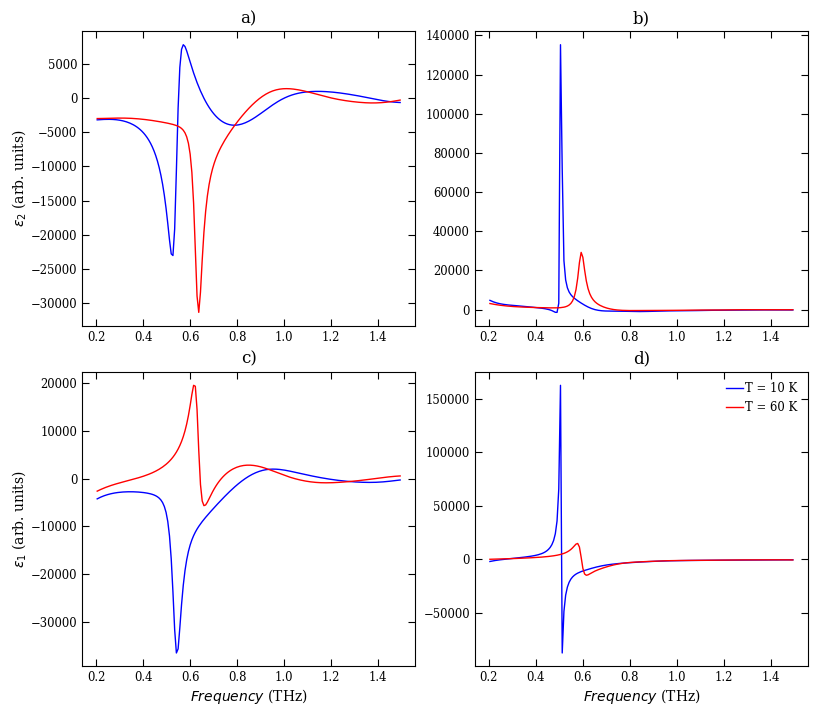

In [16]:
# Leer los archivos .dat
# f = plt.figure(figsize=(15,13))
permitividade_window = []
permitividade = []
temps = []
N = 2**12
nk0 = left
nk1 = right_sample
nk2 = right_subs
fig = plt.figure(figsize=(18, 10))
for i,j in enumerate(archivos_ordenados_s[::-1]):


    path_signal = os.path.join(path_analisis,j)
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
    temps.append(extraer_temperatura(path_signal))
    params_window = ['gaussian', 50]
    # params_window = ['barthann']
    x,y = getFilterdata(path_signal,nk1,nk0)
    x_ref,y_ref = getFilterdata(path_ref,nk2,nk0)
   
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,nk0,nk1,nk2,params_window)
    # Datos substrate
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]
    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]


    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.5
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    fft_y_signal = fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]

    
    # phase = idx_max_signal-idx_max_substrate

    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    n = 2.6

    
    permitividade_window.append(ep_con)
    permitividade.append(ep_sin)


#     plt.subplot(221)
#     plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada), label='FFT SIGNAL',color = colors[i])
#     plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
#     plt.title('PbTe')
#     #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
#     #plt.legend()

#     plt.subplot(222)
#     plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada), label='FFT SUBSTRATE',color = colors[i])
#     plt.title('Substrate')
#     #plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
#     #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
#     # plt.legend()



#     plt.subplot(223)
#     plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3,color = colors[i])
    
#     #plt.yscale('log')
#     plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
#     plt.xlabel(r'$\omega$ [THz]')
#     # plt.legend()
# # 

#     plt.subplot(224)
#     plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, label='with window '+str(extraer_temperatura(archivos_ordenados_s[i]))+' K',color = colors[i])
#     #plt.yscale('log')
    
#     plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
#     # plt.xlabel(r'$\omega$ [THz]')
#     plt.xlabel('$\omega$ [THz]')
#     #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
#     #plt.legend()


fig, (ax1, ax2) = plt.subplots(2,2,figsize=(8, 7))
offset = 0.5  # Desplazamiento vertical entre las curvas
cont = 0
for i in range(1,len(permitividade_window),3):
    ep_window = permitividade_window[-i]
    ep = permitividade[-i]
    ax1[0].plot(nu_filtradas, np.imag(ep_window) + cont * offset, color=colors[-i], label=f'T = {round(temps[-i],3)} K')
    ax1[0].set_ylabel(r'$\epsilon_2$ (arb. units)')
    ax1[0].set_title('a)')

    ax1[1].plot(nu_filtradas, np.imag(ep) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],1)} K')
    ax1[1].set_title('b)')
    # ax1[1].set_xlabel(r'$\omega$ [THz]')
    #ax2.set_ylabel(r'$\epsilon^{(2)}$')
    #ax1.set_title('Sample: '+sample)
    ax2[0].plot(nu_filtradas, np.real(ep_window) + cont * offset, color=colors[-i], label=f'T = {round(temps[-i],31)} K')
    ax2[0].set_ylabel(r'$\epsilon_1$ (arb. units)')
    ax2[0].set_xlabel(r'$Frequency$ (THz)')
    ax2[0].set_title('c)')
    #ax2.set_title('Sample: '+sample)
    ax2[1].plot(nu_filtradas, np.real(ep)+ cont * offset, color=colors[-i], label=f'T = {int(temps[-i])} K')
    ax2[1].set_xlabel(r'$Frequency$ (THz)')
    # ax2[1].set_ylabel(r'$\epsilon^{(1)}$')
    ax2[1].set_title('d)')
    plt.legend(loc='upper right')
    cont+=1


plt.savefig("fig4.png", dpi=300, bbox_inches='tight', format='png')
  

C:\Users\esmaru\AppData\Local\Temp\ipykernel_5896\3966674441.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right')
C:\Users\esmaru\AppData\Local\Temp\ipykernel_5896\3966674441.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


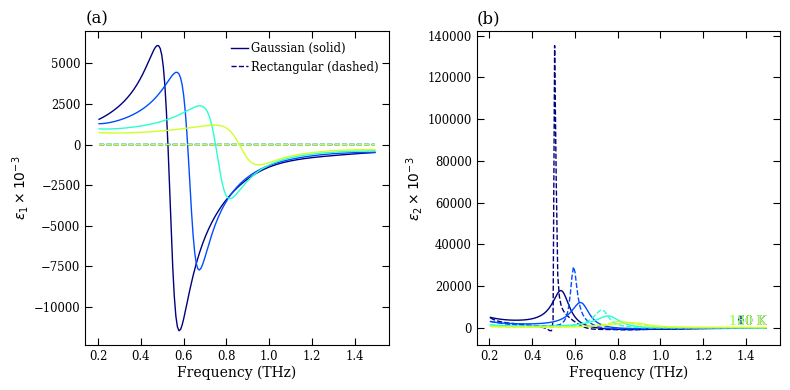

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 1 fila, 2 columnas

offset = 0.9  # Desplazamiento vertical entre las curvas
cont = 0

for i in range(1, len(permitividade_window)-3, 3):
    ep_window = permitividade_window[-i]
    ep = permitividade[-i]


    # Solo añadir el label en la primera iteración
    if i == 1:
        ax1.plot(nu_filtradas, np.real(ep_window)+ cont * offset,
                 color=colors[-i], label='Gaussian (solid)')
        ax1.plot(nu_filtradas, np.real(ep) / max(np.real(ep)) + cont * offset,
                 '--', color=colors[-i], label='Rectangular (dashed)')
    else:
        ax1.plot(nu_filtradas, np.real(ep_window)  + cont * offset,
                 color=colors[-i], label='_nolegend_')
        ax1.plot(nu_filtradas, np.real(ep) / max(np.real(ep)) + cont * offset,
                 '--', color=colors[-i], label='_nolegend_')
    ax1.set_ylabel(r'$\epsilon_1 \times 10^{-3}$')
    ax1.set_title('(a)',loc='left')
    ax1.set_xlabel(r'Frequency (THz)')

        # Subplot 1: Im(ep_window) y Im(ep)
    y_vals = np.imag(ep_window) + cont * offset

    ax2.plot(nu_filtradas, y_vals, color=colors[-i])

    # Posicionar el texto sobre el último punto
    x_text = nu_filtradas[-1]
    y_text = y_vals[-1] + 0.05  # puedes ajustar 0.05 si queda muy pegado o muy lejos

    ax2.text(x_text, y_text, f'{int(temps[-i])} K',
            color=colors[-i], fontsize=9, ha='right', va='bottom')
    ax2.plot(nu_filtradas, np.imag(ep) + cont * offset,
             '--', color=colors[-i]    )
    ax2.set_ylabel(r'$\epsilon_2 \times 10^{-3}$ ')
    ax2.set_title('(b)',loc='left')
    ax2.set_xlabel(r'Frequency (THz)')


    cont += 1

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig("fig4.png", dpi=300, bbox_inches='tight', format='png')
plt.show()


# PbSnTe

In [ ]:
ruta_actual = os.getcwd()


carpeta = os.path.join(ruta_actual, 'PbSnTe','PbSnTe+0.06Bi','PbSnTe+0.06Bi')


carpeta_ref = os.path.join(ruta_actual,'PbSnTe',"Substrate_PbSnTe+0.06Bi","Substrate_PbSnTe+0.06Bi")

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

N = 4 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1\Average_9.1K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1.
Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1\Average_15.0K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1.
Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1\Average_24.3K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1.
Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1\Average_35.5K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1.
Archivo c:\Users\esma

In [ ]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

delta_ls = {"19007": 0.515-0.360,
            "20000": 0.640-0.360 # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20000"
d = 0.002

# Correccion referencia

Ajuste: y = 0.0020 * x + 0.4399
Para Temp = 350, data_cal = 1.1291


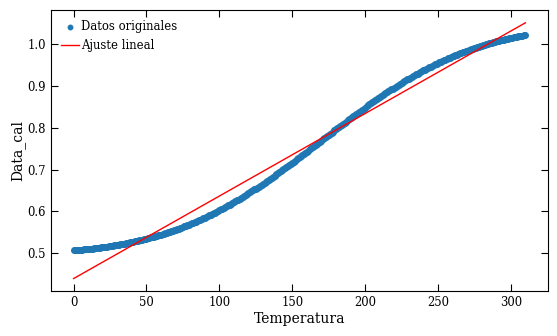

In [ ]:
# Tus datos

correc_temp = os.path.join(ruta_actual, 'PbSnTe/subs_2_calibration.csv',)
data = pd.read_csv(correc_temp, sep=',')

Temp_cal = data['Unnamed: 0'].values
data_cal = data['0'].values

# Ajuste lineal
coef = np.polyfit(Temp_cal, data_cal, 1)  # grado 1 -> lineal
m, b = coef
print(f'Ajuste: y = {m:.4f} * x + {b:.4f}')

# Función para predecir nuevos valores
def predict(temp):
    return m * temp + b

# Ejemplo: predecir data_cal para una nueva temperatura
temp_nueva = 350  # o el valor que quieras
data_cal_predicha = predict(temp_nueva)
print(f'Para Temp = {temp_nueva}, data_cal = {data_cal_predicha:.4f}')

# (opcional) Graficar el ajuste
plt.scatter(Temp_cal, data_cal, label='Datos originales')
plt.plot(Temp_cal, predict(Temp_cal), color='red', label='Ajuste lineal')
plt.xlabel('Temperatura')
plt.ylabel('Data_cal')
plt.legend()
plt.show()

In [ ]:
def anim2(left,right_sample,right_subs,index,correc_subs,desv):
    
    f = plt.figure(figsize=(18, 25),dpi=200)

    N = 2**12

    global nk0, nk1, nk2
    nk0 = left
    nk1 = right_sample
    nk2 = right_subs

    path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
    params_window = ['gaussian', desv]
   # params_window = ['flattop']
    # params_window = ['barthann']
    temp_nueva = extraer_temperatura(archivos_ordenados_s[int(index)])
    correc_temp =  predict(temp_nueva)

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

    # Datos sin ventana.
    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

    y_ref = y_ref*correc_temp 
    y_substrate_padding = y_substrate_padding*correc_temp 

    # Datos con ventana.
    
    plt.subplot(421)
     # Determinar el período de la señal
    x_min, x_max = np.min(x_ref), np.max(x_ref)
    period = x_max - x_min  # Longitud del período

    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x_ref - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x_ref] + x_right)
    y_periodic = np.tile(y_ref, 2 * n_repeats + 1)  
    #plt.plot(x,y/max(y),'k',label='Signal rectangle window')
    plt.plot(x_ref,y_ref/max(y_ref),'--r',label='Reference using rectangle window')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='red', alpha=0.4)
    # plt.plot(x,ventana,'r',label='Barthann window')
    # plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada),'o',color = colors[-int(index)],label='Signal + window')
    plt.xlabel('t [ps]')
    plt.title(f'T = '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend(loc='upper right')

    plt.subplot(422)

     # Determinar el período de la señal
    x_min, x_max = np.min(x), np.max(x)
    period = x_max - x_min  # Longitud del período
    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x] + x_right)
    y_periodic = np.tile(y, 2 * n_repeats + 1)  

    plt.plot(x,y/max(y),'k',label='Film signal using rectangle window')
    plt.xlabel('t (ps)')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='black', alpha=0.4)

    plt.legend(loc='upper right')
    


    plt.subplot(423)
     # Determinar el período de la señal
    plt.plot(y_substrate_padding*ventana/max(y_substrate_padding*ventana),'k',label=f'Reference+rectangle+{params_window[0]} window')
    plt.plot(y_substrate_padding/max(y_substrate_padding),'r',label=f'Reference+rectangle window')
    plt.plot(ventana,color='silver',label=f'{params_window[0]} window')
    # plt.plot(y_subs_ventana/max(y_subs_ventana),'--r',label='Substrate + window')
    plt.xlabel('t [ps]')
    #plt.title(f'T = '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend()

    plt.subplot(424)

    plt.plot(y_signal_ventaneada/max(y_signal_ventaneada),'k',label=f'Film signal+rectangle+{params_window[0]} window')
    plt.plot(y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana),'r',label=f'Reference+rectangle window')
    plt.plot(ventana,color='silver',label=f'{params_window[0]} window')
    plt.legend()


    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.15, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_window = fft_window[mask]

    global delta_ls_corr

    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    plt.subplot(425)

    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada),'k',label='FFT substrate using windows')
    plt.plot(nu_filtradas, np.abs(fft_y_subs), 'r',label='FFT substrate using rectangle window')
    plt.yscale('log')
    plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()


    plt.subplot(426)

    plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)/max(np.abs(fft_y_signal_ventaneada)),'k', label='FFT film signal using windows')
    plt.plot(nu_filtradas, np.abs(fft_y_signal)/max(np.abs(fft_y_signal)), 'r',label='FFT film signal using rectangle window')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')
    
    
    plt.yscale('log')
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()

    plt.subplot(427)
    plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'k', label='Using window ')
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r',label='Rectangle window')
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    #plt.xlabel(r'$\omega$ [THz]')
    plt.legend()


    plt.subplot(428)
    plt.plot(nu_filtradas, np.real(ep_con)*1e-3, 'k', label='Using windows')
    plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r',label='Rectangle window')
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    plt.legend()

    # plt.savefig("my_figure.png", dpi=300, bbox_inches='tight', format='png')
    plt.show()
  

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        left= widgets.FloatSlider(min=350,max=420,value=350,step=0.1,**opc),
        right_sample= widgets.FloatSlider(min=350,max=420,value=410,step=0.1,**opc),
        right_subs= widgets.FloatSlider(min=350,max=420,value=406.4,step=0.1,**opc),
        index= widgets.FloatSlider(min=0,max=len(archivos_ordenados_s)-1,value=7,step=1,**opc),
        correc_subs=widgets.FloatSlider(min=-delta_ls[sample],max=delta_ls[sample],value=0,step=0.001,**opc),
        desv = widgets.FloatSlider(min=0,max=200,value=62.097,step=0.001,**opc)

        )

interactive(children=(FloatSlider(value=350.0, continuous_update=False, description='left', max=420.0, min=350…

<function __main__.anim2(left, right_sample, right_subs, index, correc_subs, desv)>

In [ ]:

20+40+30+30+60+40+60+30+60+60+60+45+45+60+60+60+60

820

64.6
39
39
39


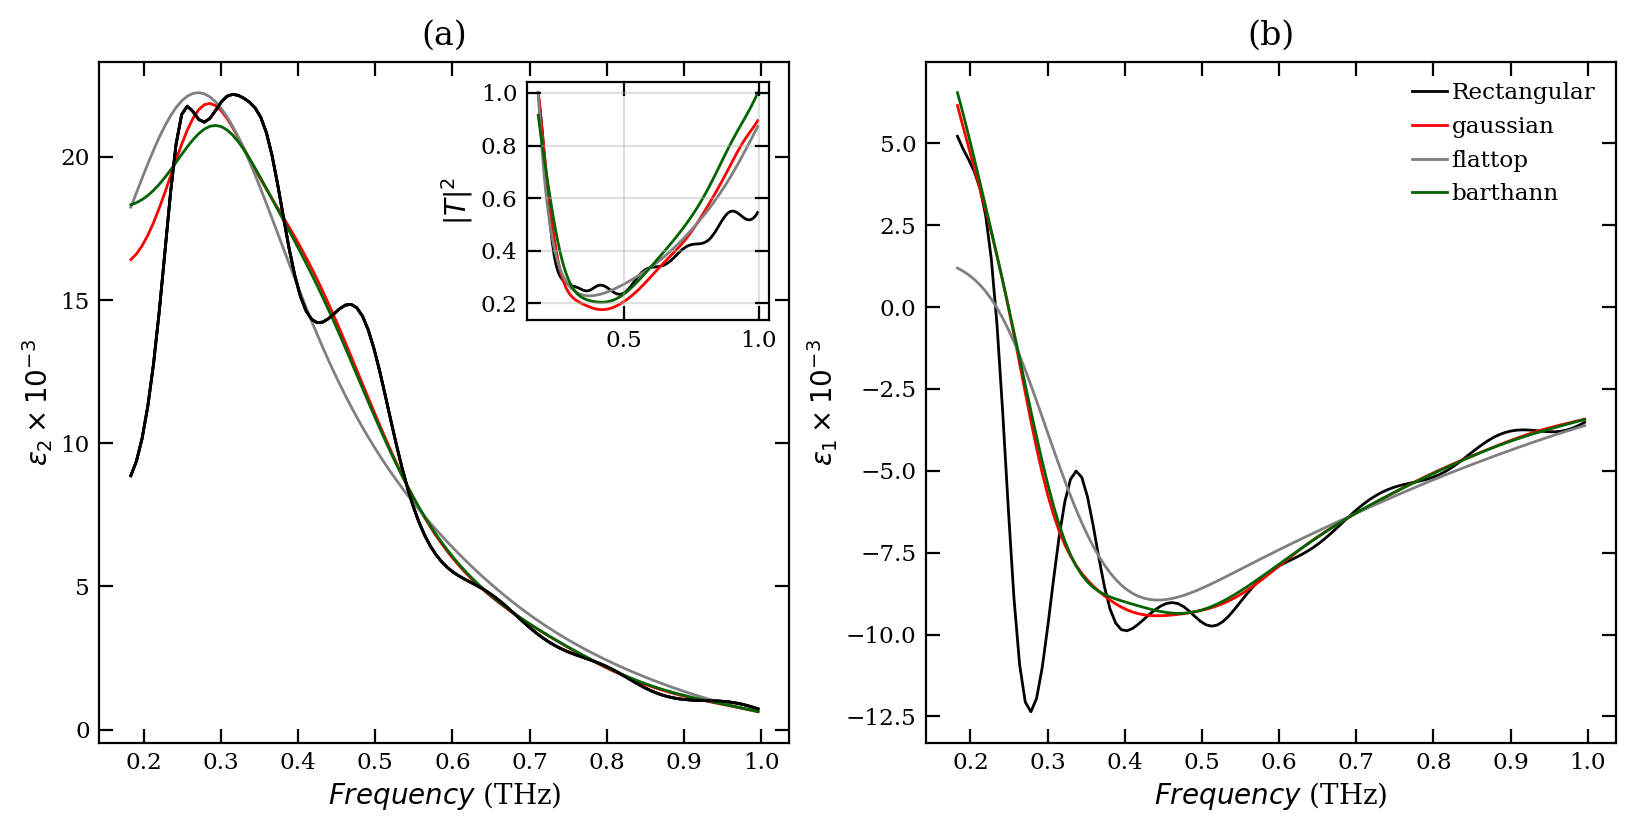

In [ ]:
left,right_sample,right_subs,index,correc_subs,desv = nk0, nk1, nk2,6,0,91.122
params_window1 = ['gaussian', desv]
params_window2 = ['flattop']
params_window3 = ['barthann']
ventanas = [params_window1,params_window2,params_window3]
colors = ['red','gray','darkgreen']
names = [params_window1[0],params_window2[0],params_window3[0]]


f = plt.figure(figsize=(8, 4),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
temp_nueva = extraer_temperatura(archivos_ordenados_s[int(index)])
correc_temp =  predict(temp_nueva)
print(temp_nueva)

Transmission = []


for count,j in enumerate(ventanas):  

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,j)

    # Datos sin ventana.
    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

    y_ref = y_ref*correc_temp 
    y_substrate_padding = y_substrate_padding*correc_temp 

    x = x-x.iloc[len(x)//2]
    x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]

    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

 
    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
    # Aplicar ventana de Hamming a la señal

    

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.18, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]


    delta_ls_corr = delta_ls[sample] 
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n
    # print(T_ventana)

    plt.subplot(121)

    plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, colors[count])
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'k',label='Rectangular window')
    plt.xlabel(r'$Frequency$ (THz)')
    plt.title('(a)')
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon_2\times 10^{-3}$')
    #plt.xlabel(r'$\omega$ [THz]')
    #plt.legend()

    # Configurar los límites de la lupa
    zoom_xlim = (xmin, 1.0)  # Ajusta estos valores según tus necesidades

    # Crear máscaras para cada señal en el rango de zoom
    mask_x = (nu_filtradas >= zoom_xlim[0]) & (nu_filtradas <= zoom_xlim[1])

    # Obtener los valores de Y para cada señal en el rango de zoom
    y1_zoom =  abs(T)[mask_x]/max(abs(T))
    # Calcular los límites Y considerando todas las señales
    y_min = np.min(y1_zoom)
    y_max = np.max(y1_zoom)
    margin = 0.1 * (y_max - y_min)  # 10% de margen


    Transmission.append(T_ventana)
    # Crear la lupa
    if count==len(ventanas)-1:
        # Crear la lupa
        ax = plt.gca()
        ax_inset = inset_axes(ax, width="35%", height="35%", loc='upper right', 
                      bbox_to_anchor=(-0.03,-0.03, 1, 1),
                      bbox_transform=ax.transAxes, borderpad=0)

    # Graficar solo los datos en el rango de zoom (mejor rendimiento)
        ax_inset.plot(nu_filtradas[mask_x], y1_zoom, 'k')

        for cc,sign in enumerate(Transmission):
            
            # ax_inset.plot(x_periodic[mask_x_periodic], y2_zoom, color='black', alpha=0.4, label='Señal periódica')
            ax_inset.plot(nu_filtradas[mask_x],  np.abs(sign[mask_x])**2/max(np.abs(sign[mask_x])**2), colors[cc])


            # Configurar los límites con margen
            # ax_inset.set_xlim(zoom_xlim)
            # ax_inset.set_ylim(y_min - margin, y_max + margin)
            ax_inset.set_ylabel(r'$|T|^2$')
            # ax_inset.set_xlabel(r'$Frequency$ (THz)')
        
            # Añadir elementos de estilo
            ax_inset.grid(True, alpha=0.4)
        # ax_inset.set_title(f'Zoom: {zoom_xlim[0]}-{zoom_xlim[1]} ps', fontsize=8)


    plt.subplot(122)

    if count==0:
        plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'k',label='Rectangular')

    plt.plot(nu_filtradas, np.real(ep_con)*1e-3,color= colors[count],label=names[count])
    plt.title('(b)')
    
    plt.ylabel(r'$\epsilon_1\times 10^{-3}$')
    plt.xlabel(r'$Frequency$ (THz)')
    
    


plt.legend()


plt.savefig("fig5.png", dpi=300, bbox_inches='tight', format='png')


In [ ]:
x1,x2 = 0.15,1.05

path_air1 = r'C:\Users\esteb\Escritorio\physics\mestrado_thz_physics\paper_window\Air+Water'
archivos = os.listdir(path_air1)

labels = [extraer_humedad(nombre_archivo) for nombre_archivo in archivos]
# Filtrar solo archivos (excluyendo carpetas)
archivos = [os.path.join(path_air1, archivo) for archivo in archivos if os.path.isfile(os.path.join(path_air1, archivo))]

In [ ]:
from scipy.signal.windows import gaussian

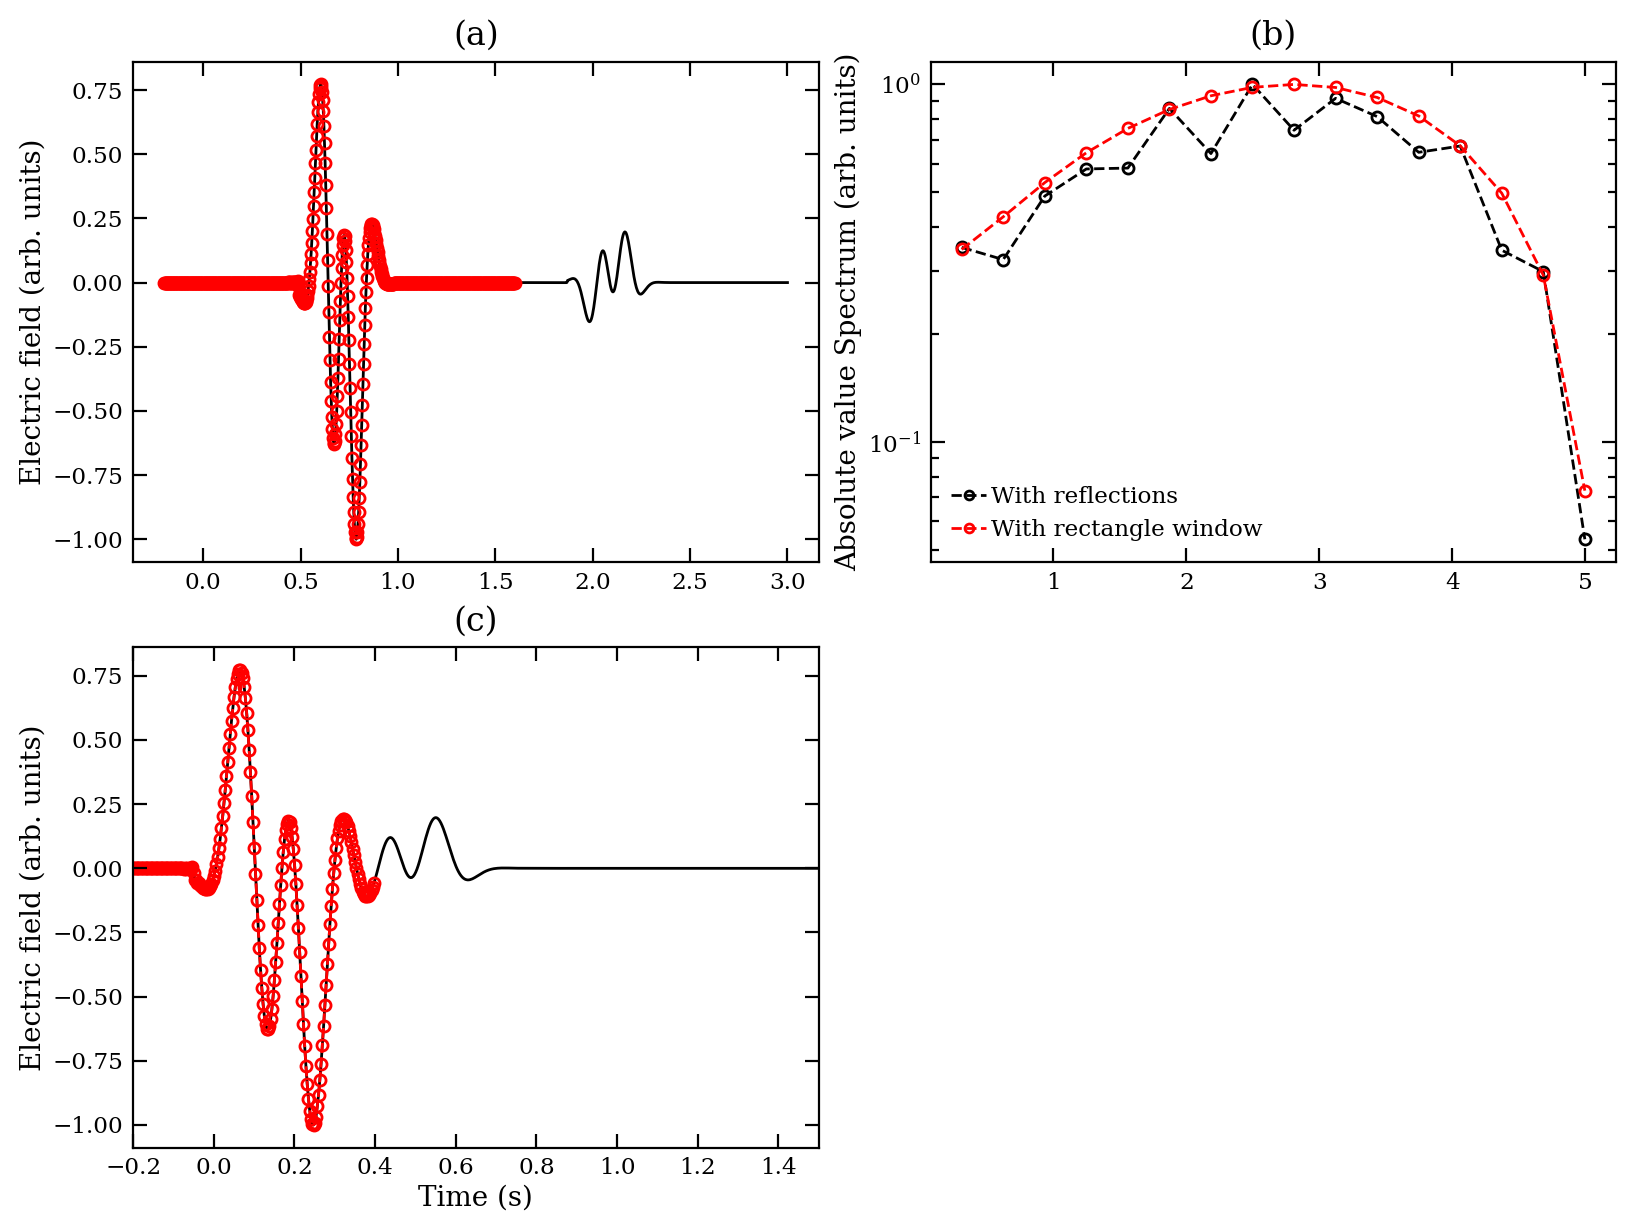

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='τs', readout_format='.3f', …

<function __main__.anim2(τs, τc, τp, M, n, tt, dd, w, sigma)>

In [ ]:
def anim2(τs,τc,τp,M,n,tt,dd,w,sigma):
    
    # Constantes
    τs = τs*1e-14  # en segundos
    τc = τc*1e-14   # en segundos
    τp = τp*1e-15 # en segundos
    c = 299792458

    n = int(n)

    # # Definir la función I_PC(t)
    # def IPC(t):
    #     term1 = np.exp((τp**2 / (4 * τc**2)) - t / τc) * erfc((τp / (2 * τc)) - (t / τp))
    #     term2 = np.exp((τp**2 / (4 * τs**2)) - t / τs) * erfc((τp / (2 * τs)) - (t / τp))
    #     return (np.sqrt(np.pi) / 2) * μe * EDC * I0opt * (term1 - term2)

    # # Derivar la función respecto al tiempo t
    # def dIPC_dt(t):
    #     return derivative(IPC, t, dx=1e-15)
    
    def E_THz(t):
        # term1 = 
        term2 = τc * erfc((-t / τp) + (τp / (2 * τs))) * np.exp(-(t / τs) + (τp**2 / (4 * τs**2)))
        term3 = -τs * erfc((-t / τp) + (τp / (2 * τc))) * np.exp(-(t / τc) + (τp**2 / (4 * τc**2)))
        
        return (term2 + term3)
    
    def P(w,d,n):
        return np.exp(-1j*w/c*d*n)
    
    def t(nj,nk):
        return 2*nj/(nj+nk)
    
    def r(nj,nk):
        return (nj-nk)/(nj+nk)
    
    def FP(w,nj,nk,nl,d,M):
        term = r(nk,nl)*r(nj,nk)*P(w,d,nk)**2
        return sum(term**m for m in range(0,M+1))



    # Rango de tiempo en segundos
    N = 2**10
    T = 10
    t_vals = np.linspace(-0.2*1e-12, 3*1e-12, N)
    dt = t_vals[1]-t_vals[0]

    # Evaluar las funciones en el rango de tiempo
    # IPC_vals = IPC(t_vals)
    # dIPC_vals = dIPC_dt(t_vals)

    f = plt.figure(figsize=(8,6),dpi=200)

    Ethz = E_THz(t_vals)*np.cos(w*t_vals*1e12)
    
    nu = sp.fft.fftfreq(N,dt)
    filt = (nu*1e-12 > 0) & (nu*1e-12 < 5)
    fy_comp = FourierT(Ethz,N)
    fy_comp = fy_comp#[filt]
    nu = nu#[filt]*1e-12


    plt.subplot(221)
    n0 = 1
    n1 = 2.6
    d = 0.5*1e-3
    ft_thz_field_subs = fy_comp*t(n0,n1)*t(n1,n0)*P(nu,d,n1)*FP(nu,n0,n1,n0,d,int(M))
    ft_thz_field = fy_comp

    invers_ft_thz_field_subs = FourierI(ft_thz_field_subs,N)
    invers_ft_thz_field = FourierI(ft_thz_field,N)
    filter_t = t_vals*1e12 < 1.6
    invers_ft_thz_field_subs_rec = invers_ft_thz_field_subs[filter_t]
    finvers_ft_thz_field_subs_rec = FourierT(invers_ft_thz_field_subs_rec,N)
    plt.plot(t_vals*1e12,(invers_ft_thz_field_subs)/max(abs(invers_ft_thz_field_subs)),'k',label='Signal with reflection')
    plt.plot(t_vals[filter_t]*1e12,invers_ft_thz_field_subs_rec/max(abs(invers_ft_thz_field_subs_rec)),'ro',label='Windowed signal')
    # plt.xlabel("Time (s)")
    plt.ylabel('Electric field (arb. units)')
    plt.title('(a)')
    
    # plt.legend()
    #plt.yscale('log')

    plt.subplot(222)


    plt.plot(nu[filt]*1e-12,np.abs(ft_thz_field_subs[filt])/max(np.abs(ft_thz_field_subs[filt])),'--ko',label='With reflections')
    #plt.plot(nu[filt]*1e-12,np.abs(fy_comp[filt])/max(np.abs(fy_comp[filt])),'--go',label='Without reflections')
    plt.plot(nu[filt]*1e-12,np.abs(finvers_ft_thz_field_subs_rec[filt])/max(np.abs(finvers_ft_thz_field_subs_rec[filt])),'--ro',label='With rectangle window')
    # plt.plot(nu[filt]*1e-12,np.abs(fy_comp[filt])/max(np.abs(fy_comp[filt])),'--go',label='Without reflections')
    #plt.plot(nu[filt]*1e-12,np.abs(teor_fE_THz[filt])/max(np.abs(teor_fE_THz)),'--bs',label='Fourier transform of signal without reflection0s')
    # plt.xlabel(r"$\nu$ [THz]")
    plt.title('(b)')
    plt.ylabel('Absolute value Spectrum (arb. units)')
    plt.yscale('log')
    plt.legend()
    #plt.xlim(0,10)

    plt.subplot(223)

    # Rango de tiempo en segundos
    N = 2**10
    T = 10
    t_vals = np.linspace(-0.2*1e-12, 3*1e-12, N)
    dt = t_vals[1]-t_vals[0]

    # Evaluar las funciones en el rango de tiempo
    # IPC_vals = IPC(t_vals)
    # dIPC_vals = dIPC_dt(t_vals)
    Ethz = E_THz(t_vals)*np.cos(w*t_vals*1e12)

    
    nu = sp.fft.fftfreq(N,dt)
    filt = (nu*1e-12 > 0) & (nu*1e-12 < 5)

    fy_comp = FourierT(Ethz,N)
    fy_comp = fy_comp#[filt]
    nu = nu#[filt]*1e-12
    
    n0 = 1
    n1 = 2.6
    d = dd*1e-3
    ft_thz_field_subs = fy_comp*t(n0,n1)*t(n1,n0)*P(nu,d,n1)*FP(nu,n0,n1,n0,d,int(M))
    ft_thz_field = fy_comp

    invers_ft_thz_field_subs = FourierI(ft_thz_field_subs,N)
    invers_ft_thz_field = FourierI(ft_thz_field,N)
    filter_t = t_vals*1e12 < tt
    invers_ft_thz_field_subs_rec = invers_ft_thz_field_subs[filter_t]

    finvers_ft_thz_field_subs_rec = FourierT(invers_ft_thz_field_subs_rec,N)
    plt.plot(t_vals*1e12,(invers_ft_thz_field_subs)/max(abs(invers_ft_thz_field_subs)),'k',label='Signal with reflection')
    plt.plot(t_vals[filter_t]*1e12,invers_ft_thz_field_subs_rec/max(abs(invers_ft_thz_field_subs_rec)),'--ro',label='Windowed signal')
    plt.xlabel("Time (s)")
    
    plt.xlim(min(t_vals*1e12),1.5)
    plt.ylabel('Electric field (arb. units)')
    plt.title('(c)')
    
    # plt.legend()
    #plt.yscale('log')

        # Configurar los límites de la lupa
    x = t_vals[filter_t]*1e12
    zoom_xlim = (max(x)-0.1,max(x)+0.1)
 
    x_min, x_max = np.min(x), np.max(x)
    period = x_max - x_min  # Longitud del período
    n_repeats = 1
    x_right = [x + period * i for i in range(1, n_repeats + 1)]
    
    # Crear máscaras para cada señal en el rango de zoom
    mask_x = (x >= zoom_xlim[0]) & (x <= zoom_xlim[1])

    # Obtener los valores de Y para cada señal en el rango de zoom
    y1_zoom = invers_ft_thz_field_subs_rec/max(abs(invers_ft_thz_field_subs_rec))
    x_periodic = np.concatenate([x] + x_right)
    y_periodic = np.tile(y1_zoom,  n_repeats + 1)  
    # x_ext = np.linspace(x_min,x_max,len(ventana))
    y2_zoom = (y_periodic/max(y_periodic))
    # y3_zoom = (y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana))[mask_x_ext]

    # Calcular los límites Y considerando todas las señales
    # y_min = min(np.min(y1_zoom), np.min(y2_zoom), np.min(y3_zoom))
    # y_max = max(np.max(y1_zoom), np.max(y2_zoom), np.max(y3_zoom))
    # margin = 0.1 * (y_max - y_min)  # 10% de margen

    # Crear la lupa
    ax = plt.gca()
    ax_inset = inset_axes(ax, width="25%", height="25%", loc='upper right', 
                      bbox_to_anchor=(-0.03,-0.03, 1, 1),
                      bbox_transform=ax.transAxes, borderpad=0)

    # Graficar solo los datos en el rango de zoom (mejor rendimiento)
    ax_inset.plot(x, y1_zoom, 'r', label='Señal rectangular')
    mask_x = (x_periodic >= 0.4)
    ax_inset.plot(x_periodic[mask_x ], y2_zoom[mask_x ], color='red', alpha=0.4, label='Señal periódica')
    # ax_inset.plot(x_ext[mask_x_ext], y3_zoom, 'r', label='Señal ventaneada')

    # Configurar los límites con margen
    ax_inset.set_xlim(zoom_xlim)
    ax_inset.set_ylim(-0.2,0.25)

    # Añadir elementos de estilo
    ax_inset.grid(True, alpha=0.4)
    ax_inset.set_title(f'Zoom: {round(zoom_xlim[0],2)}-{round(zoom_xlim[1],2)} ps', fontsize=8)


    plt.subplot(224)

    NN = len(invers_ft_thz_field_subs_rec)


    std = sigma  # Desviación estándar de la gaussiana

    # Crear ventana gaussiana centrada en cero
    gauss_base = gaussian(NN, std)


    gauss_window = gauss_base

    # Multiplicar la señal por la ventana gaussiana

    # Aplicar la ventana
    windowed_array = np.array(invers_ft_thz_field_subs_rec) * np.array(gauss_window)

    fy_comp2 = FourierT(windowed_array,N)
    



    #plt.plot(nu[filt]*1e-12,np.abs(ft_thz_field_subs[filt])/max(np.abs(ft_thz_field_subs[filt])),'--ro',label='Signal with reflections')
    plt.plot(nu[filt]*1e-12,np.abs(finvers_ft_thz_field_subs_rec[filt])/max(np.abs(finvers_ft_thz_field_subs_rec[filt])),'--ro',label='With Rectangular Window')
    plt.plot(nu[filt]*1e-12,np.abs(fy_comp[filt])/max(np.abs(fy_comp[filt])),'--go',label='Without Reflections')
    #plt.plot(nu[filt]*1e-12,np.abs(teor_fE_THz[filt])/max(np.abs(teor_fE_THz)),'--bs',label='Fourier transform of signal without reflection0s')
    plt.plot(nu[filt]*1e-12,np.abs(fy_comp2[filt])/max(np.abs(fy_comp2[filt])),'--bo',label='Using Gaussian indow')
    plt.xlabel(r"$Frequency$ (THz)")
    plt.ylabel('Absolute value Spectrum (arb. units)')
    plt.title('d)')
    plt.yscale('log')
    plt.legend()

    plt.savefig("fig6.png", dpi=300, bbox_inches='tight', format='png')

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        τs= widgets.FloatSlider(min=0,max=100,value=1,step=1,**opc),
        τc= widgets.FloatSlider(min=0,max=14,value=0.740,step=0.01,**opc),
        τp= widgets.FloatSlider(min=0,max=500,value=97,step=1,**opc),
        M = widgets.FloatSlider(min=0,max=10,value=1,step=1,**opc),
        n = widgets.FloatSlider(min=0,max=10,value=1,step=1,**opc),
        tt = widgets.FloatSlider(min=0,max=10,value=0.40,step=0.01,**opc),
        dd = widgets.FloatSlider(min=0,max=1,value=0.11,step=0.01,**opc),
        w= widgets.FloatSlider(min=0,max=400,value=32,step=0.01,**opc), 
        sigma= widgets.FloatSlider(min=0,max=400,value=50,step=0.01,**opc),
        )

# Aire

In [ ]:
# Parameters for fitting
nu11, nu21 = 0.4, 0.7
p01 = [1,0.25,0.556,0.01]
nu12, nu22 = 0.6, 0.9
p02=[1,0.25,0.75,0.01]
nu13, nu23 = 0.9, 1.075
p03=[1,0.25,0.98,0.01]

initial_seed = [p01,p02,p03]
nus1 = [nu11,nu12,nu13]
nus2 = [nu21,nu22,nu23]

In [ ]:
nu_filtradas1, ref = extrac_data_freq(x1,x2,os.path.join(path_air1, archivos[-1]))
# f = plt.figure(figsize=(15,5))

nu1, nu2 = 0.9, 1.075

parameters = []
parameters_hum = np.zeros((len(archivos)-1,4))

# colors = ['b','r','k','g','c']
kk = 0

for kk in range(len(nus1)):
    cont = 0
    parameters_hum = np.zeros((len(archivos)-1,4))

    for j,arc in enumerate(archivos):

        if j!=len(archivos)-1:
            nu_filtradas1, fourier1 = extrac_data_freq(x1,x2,os.path.join(path_air1, arc))
            filter_omega = (nu_filtradas1 > nus1[kk]) & (nu_filtradas1 < nus2[kk])
            params = fit_trans_model(nu_filtradas1,np.abs(fourier1/ref),nus1[kk], nus2[kk],p0=initial_seed[kk])
            parameters_hum[cont,0] = params[0]
            parameters_hum[cont,1] = params[1]
            parameters_hum[cont,2] = params[2]
            parameters_hum[cont,3] = params[3]

            cont+= 1

    parameters.append(parameters_hum)

In [ ]:
archivos

['C:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\paper_window\\Air+Water\\20230928-144546__eduardo__THZ55-70__PMP0__S2207L__64RH__297.4K__Air__TEST2.dat',
 'C:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\paper_window\\Air+Water\\20230928-150125__eduardo__THZ55-70__PMP0__S2207L__35RH__297.5K__Air__TEST2.dat',
 'C:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\paper_window\\Air+Water\\20230928-150647__eduardo__THZ55-70__PMP0__S2207L__23RH__297.5K__Air__TEST2.dat',
 'C:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\paper_window\\Air+Water\\20230928-151412__eduardo__THZ55-70__PMP0__S2207L__17RH__297.5K__Air__TEST2.dat',
 'C:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\paper_window\\Air+Water\\20230928-151509__eduardo__THZ55-70__PMP0__S2207L__14RH__297.5K__Air__TEST2.dat',
 'C:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\paper_window\\Air+Water\\20231106-164427__Eduardo__THZ55-65__PMP0__S2207L__5RH__296.1K__SemF

In [ ]:
x1,x2 = 0.15,1.01

In [ ]:
def anim2(τs,τc,τp,a,sigma):

    
    f = plt.figure(figsize=(8,6),dpi=200)

    y_vent = []
    plt.subplot(211)

    cont = 0
    colores = [
    "#1f77b4",  # azul
    "#ff7f0e",  # naranja
    "#2ca02c",  # verde
]
    for j in range(0,len(archivos),2):
        
        
        t, y = extrac_data_time(os.path.join(path_air1, archivos[j]))

        # x =t-t.iloc[len([t//2]]]+40]
        NN = len(y)
        std = sigma  # Desviación estándar de la gaussiana
        # Crear ventana gaussiana centrada en cero
        gauss_base = gaussian(NN, std)
        max_idx = np.argmax(np.abs(y))
        gauss_base  = np.roll(gauss_base, max_idx - NN // 2)
        
        y1 = y*gauss_base

        y_vent.append([t,y1])

                # Encuentra el índice del máximo
        i_max = np.argmax(np.abs(y))  # o simplemente np.argmax(y) si no es complejo

        # Desplaza t para que el máximo esté en t = 0
        t_shifted = t - t[i_max]
        plt.plot(t_shifted, (y)/max(y),color=colores[cont],label = f'{labels[j]} %')
        cont+=1

        # if j ==0:
        #     plt.plot(t,gauss_base/max(gauss_base),'k--',label = 'Gaussian window')
    

    τs = τs*1e-14*1e12  # en segundos
    τc = τc*1e-14*1e12  # en segundos
    τp = τp*1e-15*1e12 # en segundos
    t_dis = (t-t[np.argmax(y)])*1e-1
    ethz = E_THz(t_dis,τs,τc,τp)*np.cos(1*t*a)

    i_max = np.argmax(np.abs(ethz.values))  # o simplemente np.argmax(y) si no es complejo

        # Desplaza t para que el máximo esté en t = 0
    t_shifted = t - t[i_max]
        
    plt.plot(t_shifted,ethz.values/max(ethz.values),'r',label='Vacuum (simulated)')
    plt.xlim(min(t_shifted),20)
    plt.title('(a)')
    # plt.xlabel('t [ps]')
    plt.ylabel('Electric field (arb. units)')
    plt.legend(loc='upper right')

    plt.subplot(212)

    N = 2**12
    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
    fourier = FourierT(ethz.values,N)[1:len(nu)//k]
    nu = nu[1:len(nu)//k]
    xmin, xmax = x1,x2
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fourier = fourier[mask]

    def extrac_data_freq2(nu1,nu2,path_air):

        df1 = pd.read_csv(path_air, delim_whitespace=True)
        c = 0.299792458 # speed of light mm/ps
        # suma_col1 = df1['pos']* (2/c)
        suma_col2 = df1['X'].values
        NN = len(suma_col2)
        
        std = sigma  # Desviación estándar de la gaussiana
        # Crear ventana gaussiana centrada en cero
        gauss_base = gaussian(NN, std)
        max_idx = np.argmax(np.abs(y))
        gauss_base  = np.roll(gauss_base, max_idx - NN // 2)

        N = 2**12
        k = 15
        nu = sp.fft.fftfreq(N, 1/30)
        fourier = FourierT(suma_col2*gauss_base ,N)[1:len(nu)//k]
        nu = nu[1:len(nu)//k]
        xmin, xmax = nu1, nu2
        mask = (nu >= xmin) & (nu <= xmax)
        nu_filtradas = nu[mask]
        fourier = fourier[mask]

        return nu_filtradas, fourier    

    plt.plot(nu_filtradas,np.abs(fourier)/max(np.abs(fourier)),'r')
    
    f_vent = []

    cont = 0
    
    for j in range(0,len(archivos),2):

        nu_filtradas1, fourier1 = extrac_data_freq(x1,x2,os.path.join(path_air1, archivos[j]))

        
        nu_filtradas2, fourier2 = extrac_data_freq2(x1,x2,os.path.join(path_air1, arc))

        f_vent.append([nu_filtradas2, fourier2])

        plt.plot(nu_filtradas1, np.abs(fourier1)/max(np.abs(fourier1)),color=colores[cont],label = f'{labels[j]} %')
        cont+=1
        
        
        #plt.yscale('log')
    plt.title('(b)')
    plt.ylabel(r'Absolute Value Spectrum (arb. units)') 

    # plt.subplot(223)
    # for kk,m in enumerate(y_vent):

    #     x = m[0]-m[0].iloc[len(m[0])//2]+40

    #     plt.plot(x ,(m[1])/max(m[1]),label = f'{int(labels[kk])} %')
    #     if kk ==len(y_vent)-1:
    #         plt.plot(x ,gauss_base/max(gauss_base),'k--',label = 'Gaussian window')
    
       
    #     # plt.plot(x ,(m[1])/max(m[1]),label = f'{labels[kk]} %')
    #     plt.xlim(min(x),10)
    
    # plt.xlabel('Time (ps)')
    # plt.ylabel('Electric field (arb. units)')
    # plt.title('(c)')
    # plt.legend(loc='upper right')


    # plt.subplot(224)
    # for m in f_vent:
    #     plt.plot(m[0],abs(m[1])/max(abs(m[1])))
    # plt.plot(nu_filtradas,np.abs(fourier)/max(np.abs(fourier)),'r')
    # plt.ylabel(r'Absolute Value Spectrum (arb. units)') 
    # plt.xlabel(r'$Frequency$ (THz)')
    # plt.title('(d)')


    # plt.savefig("fig7.png", dpi=300, bbox_inches='tight', format='png')




opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        τs= widgets.FloatSlider(min=0,max=5,value=5,step=0.001,**opc),
        τc= widgets.FloatSlider(min=0,max=14,value=1.380,step=0.01,**opc),
        τp= widgets.FloatSlider(min=0,max=500,value=56,step=1,**opc),
        a= widgets.FloatSlider(min=0,max=5,value=1.7,step=0.01,**opc), 
        sigma= widgets.FloatSlider(min=0,max=400,value=50,step=0.01,**opc)
        )

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='τs', max=5.0, readout_forma…

<function __main__.anim2(τs, τc, τp, a, sigma)>

In [ ]:
arc

'C:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\paper_window\\Air+Water\\20231106-164427__Eduardo__THZ55-65__PMP0__S2207L__5RH__296.1K__SemFuro-Air__30V.dat'

# Graficos y gifts para la presentacion

In [ ]:
f = plt.figure(figsize=(8,6),dpi=200)

<Figure size 1600x1200 with 0 Axes>

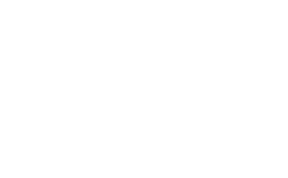

In [ ]:
# f = plt.figure(figsize=(8,6),dpi=200)

y_vent = []
plt.subplot(221)

cont = 0
colores = [
"#1f77b4",  # azul
"#ff7f0e",  # naranja
"#2ca02c",  # verde
]
j = -1
    
t, y = extrac_data_time(os.path.join(path_air1, archivos[j]))

i_max = np.argmax(np.abs(y))  # o simplemente np.argmax(y) si no es complejo
t_shifted = t - t[i_max]
plt.plot(t, y/max(y),color='k',label = f'{labels[j]} %')
plt.xlabel('t [ps]')
plt.xlim(min(t_shifted),20)
plt.axis('off')
# plt.savefig("signal.svg", format="svg")
plt.show()


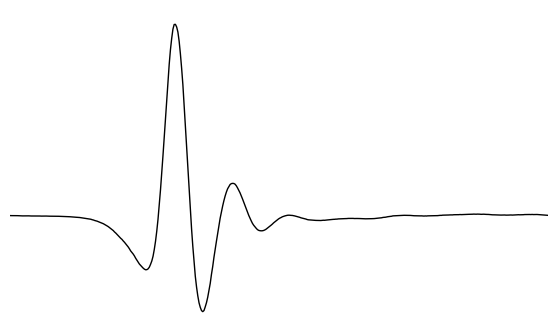

In [ ]:
nk0 = left
nk1 = right_sample
nk2 = right_subs

path_signal = os.path.join(path_analisis,archivos_ordenados_s[0])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])

# Datos sin ventana.

x_ref,y_ref = getFilterdata(path_ref,500,left)
i_max = np.argmax(np.abs(y))  # o simplemente np.argmax(y) si no es complejo
t_shifted = t - t[i_max]
t, y = extrac_data_time(os.path.join(path_air1, archivos[j]))
t_shifted = t - t[i_max]
plt.plot(t_shifted, y /max(y),'k',label = 'Signal without window')
plt.axis('off')
plt.xlim(min(t_shifted)+5,10)
plt.savefig("signal.svg", format="svg")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def animacion_correcta(x_ref, y_ref, output_path='animacion_corregida.gif'):
    """
    Crea una animación verificando y corrigiendo posibles problemas con los datos en Y.
    
    Args:
        x_ref, y_ref: Arrays de datos
        output_path: Ruta para guardar el GIF
    """
    # 1. Verificación y conversión de datos
    x_ref = np.array(x_ref, dtype=float)
    y_ref = np.array(y_ref, dtype=float)
    
    # Verificar dimensiones
    if len(x_ref) != len(y_ref):
        raise ValueError("x_ref e y_ref deben tener la misma longitud")
    
    # Verificar si todos los valores Y son cero
    if np.all(y_ref == 0):
        print("¡Advertencia: Todos los valores Y son cero!")
        print("Primeros 5 valores Y:", y_ref[:5])
    
    # 2. Configuración de la figura con límites adecuados
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Calcular límites dinámicos (evitando el caso todos ceros)
    y_min = min(y_ref) if not np.all(y_ref == 0) else -1
    y_max = max(y_ref) if not np.all(y_ref == 0) else 1
    
    ax.set_xlim(min(x_ref), max(x_ref))
    ax.set_ylim(y_min - 0.1*abs(y_min), y_max + 0.1*abs(y_max))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Animación Corregida')
    ax.grid(True)
    
    # 3. Visualización inicial de los datos (para diagnóstico)
    plt.figure()
    plt.plot(x_ref, y_ref, 'b-')
    plt.title('Visualización de Datos Originales')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()
    
    # 4. Inicialización de la animación
    fig_anim, ax_anim = plt.subplots(figsize=(10, 6))
    ax_anim.set_xlim(min(x_ref), max(x_ref))
    ax_anim.set_ylim(y_min - 0.1*abs(y_min), y_max + 0.1*abs(y_max))
    scatter = ax_anim.scatter([], [], c='blue', s=50)
    line, = ax_anim.plot([], [], 'r-', alpha=0.5)
    
    # 5. Función de actualización mejorada
    def update(frame):
        # Actualizar scatter plot
        current_x = x_ref[:frame+1]
        current_y = y_ref[:frame+1]
        scatter.set_offsets(np.column_stack((current_x, current_y)))
        
        # Actualizar línea
        line.set_data(current_x, current_y)
        
        # Verificación en tiempo real (opcional)
        if frame % 10 == 0:  # Mostrar cada 10 frames
            print(f"Frame {frame}: X={current_x[-1]:.2f}, Y={current_y[-1]:.2f}")
        
        return scatter, line
    
    # 6. Crear animación
    ani = FuncAnimation(
        fig_anim,
        update,
        frames=len(x_ref),
        interval=50,  # Más rápido
        blit=True
    )
    
    # 7. Guardar animación
    writer = PillowWriter(fps=50)
    ani.save(output_path, writer=writer)
    plt.close(fig_anim)
    
    print(f"Animación guardada en {output_path}")
    print("Diagnóstico final:")
    print(f"Rango X: {min(x_ref):.2f} a {max(x_ref):.2f}")
    print(f"Rango Y: {min(y_ref):.2f} a {max(y_ref):.2f}")

# Ejemplo de uso:
# animacion_correcta(x_ref, y_ref)

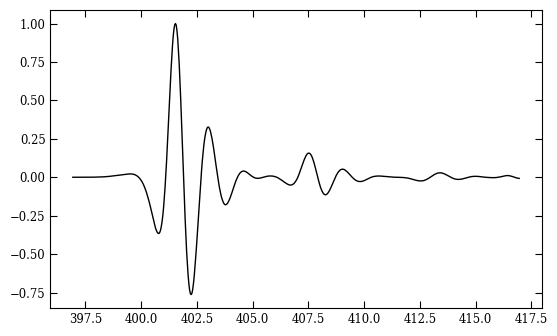

In [ ]:
x_ref,y_ref = getFilterdata(path_ref,500,left)
plt.plot(x_ref,y_ref/max(y_ref),'k',label = 'Signal without window')

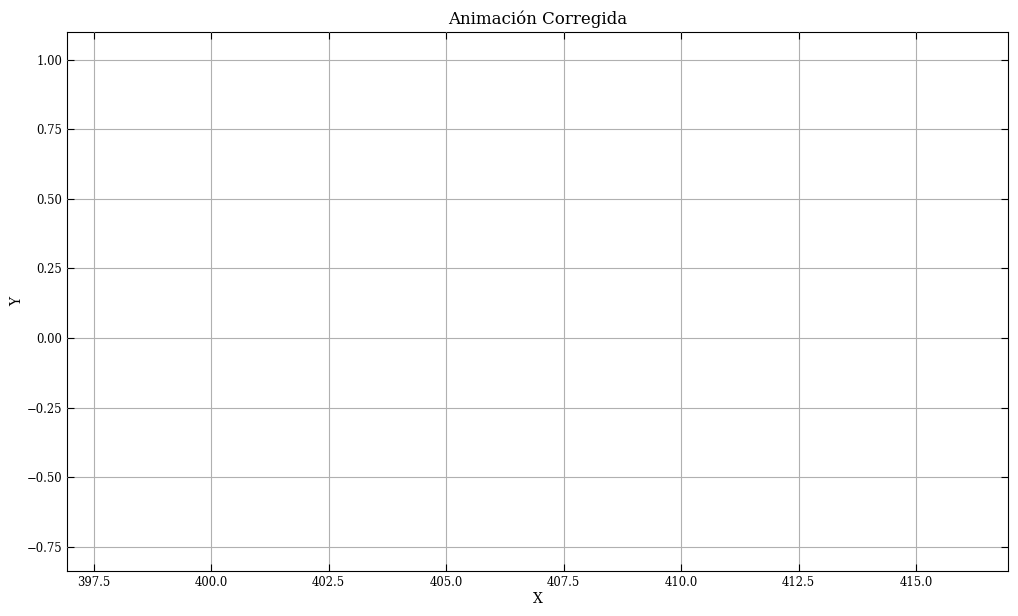

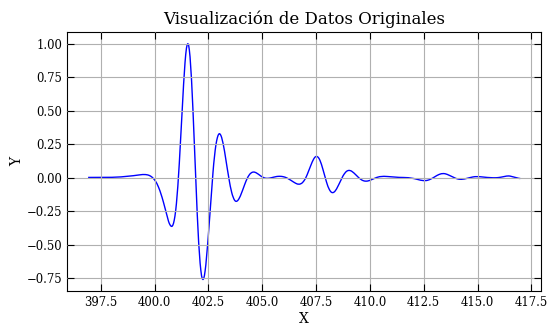

Frame 0: X=396.94, Y=0.00
Frame 0: X=396.94, Y=0.00
Frame 0: X=396.94, Y=0.00
Frame 0: X=396.94, Y=0.00
Frame 10: X=397.27, Y=0.00
Frame 20: X=397.61, Y=0.00
Frame 30: X=397.94, Y=0.00
Frame 40: X=398.28, Y=0.00
Frame 50: X=398.61, Y=0.01
Frame 60: X=398.94, Y=0.01
Frame 70: X=399.28, Y=0.02
Frame 80: X=399.61, Y=0.02
Frame 90: X=399.94, Y=-0.01
Frame 100: X=400.28, Y=-0.11
Frame 110: X=400.61, Y=-0.31
Frame 120: X=400.94, Y=-0.29
Frame 130: X=401.28, Y=0.50
Frame 140: X=401.61, Y=0.95
Frame 150: X=401.94, Y=-0.15
Frame 160: X=402.28, Y=-0.75
Frame 170: X=402.61, Y=-0.16
Frame 180: X=402.95, Y=0.31
Frame 190: X=403.28, Y=0.16
Frame 200: X=403.61, Y=-0.13
Frame 210: X=403.95, Y=-0.15
Frame 220: X=404.28, Y=-0.01
Frame 230: X=404.61, Y=0.04
Frame 240: X=404.95, Y=0.01
Frame 250: X=405.28, Y=-0.01
Frame 260: X=405.61, Y=0.01
Frame 270: X=405.95, Y=0.01
Frame 280: X=406.28, Y=-0.02
Frame 290: X=406.61, Y=-0.05
Frame 300: X=406.95, Y=-0.02
Frame 310: X=407.28, Y=0.10
Frame 320: X=407.62, Y=

In [ ]:
animacion_correcta(x_ref, y_ref/max(y_ref), 'thz_results.gif')

In [ ]:
ruta_actual = os.getcwd()

carpeta = os.path.join(ruta_actual, 'PbTe', '20-20')

#rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20'
carpeta_ref = os.path.join(ruta_actual,"PbTe","substrate","20-20")
#carpeta_ref = rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\substrate\20-20'

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

N = 4 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_10.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_20.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_40.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_60.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_80.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Avera

In [ ]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

# bis = [0.02,0.03,0.06,0.07,0.1,0.15] # Porcentaje de Bismuto.

delta_ls = {"20-20": 0.446-0.360, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20-20"
d = 0.0016

9
9.863434256241419
9.99685989432055
Discontinuidad: 0.021217680707481472


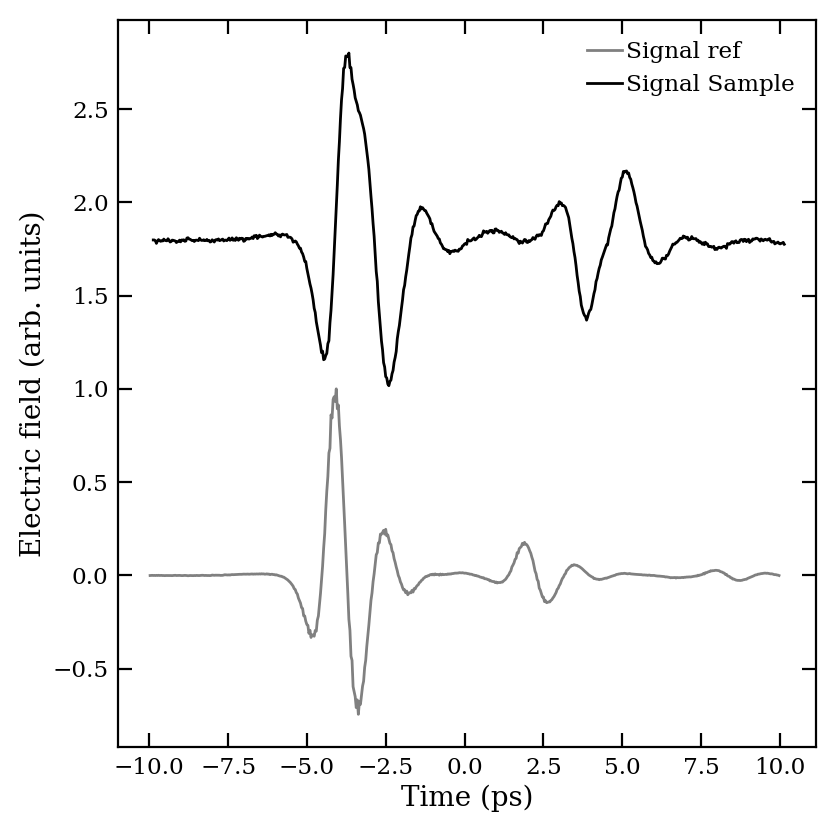

In [ ]:


left,right_sample,right_subs,index,correc_subs,desv = 380,400,400,6,-0.028,100

f = plt.figure(figsize=(4,4),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]
# params_window = ['flattop']
# params_window = ['barthann']

phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

# Datos sin ventana.
x,y = getFilterdata(path_signal,right_sample,left)
x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

a1 = right_sample-x.iloc[len(x)//2]
a2 = right_subs-x_ref.iloc[len(x_ref)//2]
print(right_sample-x.iloc[len(x)//2])
print(right_subs-x_ref.iloc[len(x_ref) // 2])
x = x-x.iloc[len(x)//2]
x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]



x_min, x_max = np.min(x_ref), np.max(x_ref)
period = x_max - x_min  # Longitud del período
n_repeats = 1
x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x_ref] + x_right)
y_periodic = np.tile(y_ref,n_repeats + 1)  
val = 1.8*2
plt.plot(x_ref,y_ref/max(y_ref),label='Signal ref',color='gray')
# plt.plot(x_periodic, y_periodic/max(y_periodic), color='gray', alpha=0.4)


x_min, x_max = np.min(x), np.max(x)
period = x_max - x_min  # Longitud del período

n_repeats = 1
x_right = [x + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x] + x_right)
y_periodic = np.tile(y,  n_repeats + 1)  



# plt.plot(x,y/max(y)+val,'r')
print('Discontinuidad:',D(np.array(y)))
# plt.xlabel('t (ps)')
# plt.plot(x_periodic, y_periodic/max(y_periodic)+val, color='red', alpha=0.4)

right_sample_proof = right_sample + 10
x_p,y_p= getFilterdata(path_signal,right_sample_proof,left)
x_p = x_p-x_p.iloc[len(x)//2]
plt.plot(x_p,y_p/max(y_p)+val/2, label='Signal Sample', color='k')
plt.xlabel('Time (ps)')
# plt.title('a)')
plt.ylabel('Electric field (arb. units)')
plt.legend(loc='upper right')

# Dibujar las tres líneas verticales
# plt.axvline(x=a1, color='r', linestyle='--',label='$h_{samp}$')
# plt.axvline(x=a2, color='gray', linestyle=':',label='$h_{ref}$')
plt.legend(loc='upper right')


9
5.86620339861912
5.000321322292791
Discontinuidad: 0.016605220097998048


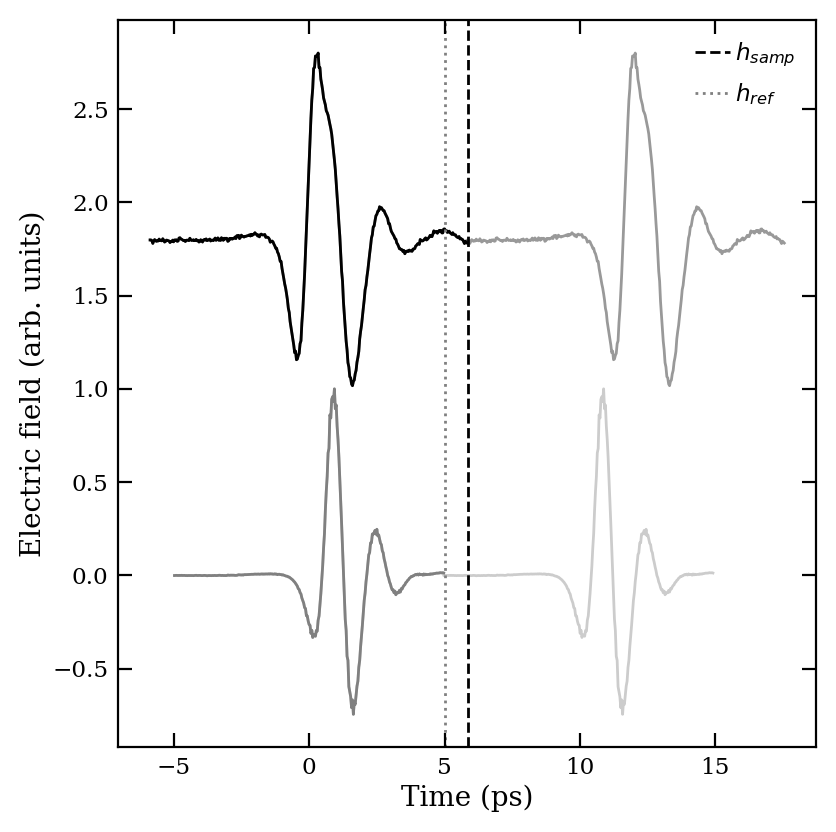

In [ ]:


left,right_sample,right_subs,index,correc_subs,desv = 380,392,390,6,-0.028,100

f = plt.figure(figsize=(4,4),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]
# params_window = ['flattop']
# params_window = ['barthann']

phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

# Datos sin ventana.
x,y = getFilterdata(path_signal,right_sample,left)
x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

a1 = right_sample-x.iloc[len(x)//2]
a2 = right_subs-x_ref.iloc[len(x_ref)//2]
print(right_sample-x.iloc[len(x)//2])
print(right_subs-x_ref.iloc[len(x_ref) // 2])
x = x-x.iloc[len(x)//2]
x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]

# plt.subplot(221)

x_min, x_max = np.min(x_ref), np.max(x_ref)
period = x_max - x_min  # Longitud del período
n_repeats = 1
x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x_ref] + x_right)
y_periodic = np.tile(y_ref,n_repeats + 1)  
val = 1.8*2
plt.plot(x_ref,y_ref/max(y_ref),color='gray')
plt.plot(x_periodic, y_periodic/max(y_periodic), color='gray', alpha=0.4)


x_min, x_max = np.min(x), np.max(x)
period = x_max - x_min  # Longitud del período

n_repeats = 1
x_right = [x + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x] + x_right)
y_periodic = np.tile(y,  n_repeats + 1)  



plt.plot(x,y/max(y)+val/2,'k')
print('Discontinuidad:',D(np.array(y)))
# plt.xlabel('t (ps)')
plt.plot(x_periodic, y_periodic/max(y_periodic)+val/2, color='black', alpha=0.4)

right_sample_proof = right_sample + 10
x_p,y_p= getFilterdata(path_signal,right_sample_proof,left)
x_p = x_p-x_p.iloc[len(x)//2]
# plt.plot(x_p,y_p/max(y_p)+val/2, color='k')
plt.xlabel('Time (ps)')
# plt.title('a)')
plt.ylabel('Electric field (arb. units)')
# #plt.legend(loc='upper right')

# Dibujar las tres líneas verticales
plt.axvline(x=a1, color='black', linestyle='--',label='$h_{samp}$')
plt.axvline(x=a2, color='gray', linestyle=':',label='$h_{ref}$')
plt.legend(loc='upper right')
# plt.axvline(x=right_sample_proof, color='b', linestyle=':')

plt.show()



8
5.86620339861912
5.000321322292791


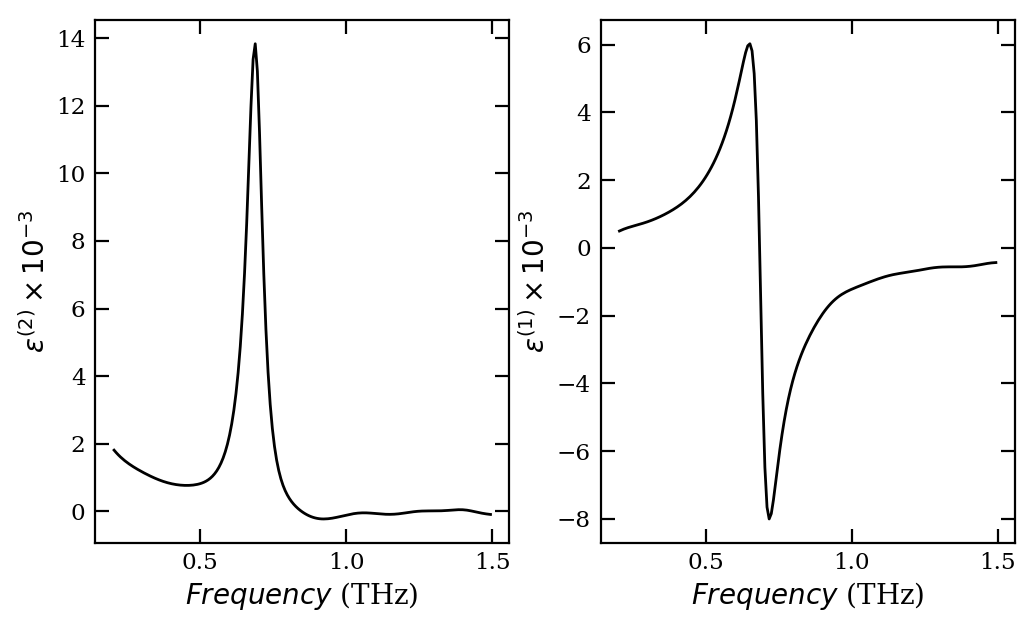

In [ ]:


left,right_sample,right_subs,index,correc_subs,desv = 380,392,390,5,-0.028,100

f = plt.figure(figsize=(5,3),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]
# params_window = ['flattop']
# params_window = ['barthann']

phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

# Datos sin ventana.
x,y = getFilterdata(path_signal,right_sample,left)
x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

a1 = right_sample-x.iloc[len(x)//2]
a2 = right_subs-x_ref.iloc[len(x_ref)//2]
print(right_sample-x.iloc[len(x)//2])
print(right_subs-x_ref.iloc[len(x_ref) // 2])
x = x-x.iloc[len(x)//2]
x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]


k = 15
nu = sp.fft.fftfreq(N, 1/30)
    # Aplicar ventana de Hamming a la señal

x_p_subs,y_p_subs= getFilterdata(path_ref,right_subs+10,left)
y_subs_ventana = pd.Series(y_p_subs)
y_signal_ventaneada = pd.Series(y_p)

# Transformada de Fourier de las señales
fft_y_signal_ventaneada = FourierT2(y,N)[1:len(nu)//k]
fft_y_subs_ventaneada = FourierT2(y_ref,N)[1:len(nu)//k]

fft_y_signal= FourierT2(y_p,N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_p_subs,N)[1:len(nu)//k]

fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

fft_y_signal= fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
fft_window = fft_window[mask]

global delta_ls_corr

delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)#*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

# plt.subplot(425)

# plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada),'k',label='FFT substrate using windows')
# plt.plot(nu_filtradas, np.abs(fft_y_subs), 'r',label='FFT substrate using rectangle window')
# plt.yscale('log')
# plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
# #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
# plt.legend()




plt.subplot(121)
plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'k', label='Without window')
# plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'k',label='Rectangle window')
plt.xlabel(r'$Frequency$ (THz)')
# plt.title('a)')
#plt.yscale('log')
plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
#plt.xlabel(r'$\omega$ [THz]')
#plt.legend()


plt.subplot(122)
plt.plot(nu_filtradas, np.real(ep_con)*1e-3, 'k', label='Without window''Rectangle windows')
# plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'k',label='Rectangle windows')
plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
plt.xlabel(r'$Frequency$ (THz)')
# plt.title('b)')
#plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
#plt.legend()#


# plt.savefig("fig1.png", dpi=300, bbox_inches='tight', format='png')
  

plt.show()



3
337
Discontinuidad: 0.021008421840423914
0.03335640951981489


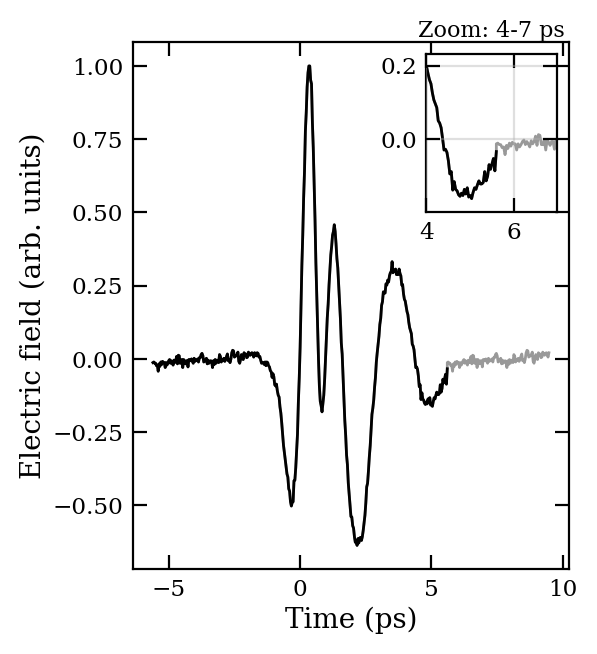

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

left,right_sample,right_subs,index,correc_subs,desv = 380,391.5,390,0,-0.028,100

f = plt.figure(figsize=(5, 3),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]
# params_window = ['flattop']
# params_window = ['barthann']

phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

print(len(ventana))

# Datos sin ventana.
x,y = getFilterdata(path_signal,right_sample,left)
x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

print('Discontinuidad:',D(np.array(y)))
y_subs_ventana = pd.Series(y_substrate_padding*ventana)
y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)


x = x-x.iloc[len(x)//2]
x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]
plt.subplot(121)

x_min, x_max = np.min(x_ref), np.max(x_ref)
period = x_max - x_min  # Longitud del período
n_repeats = 1
x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x_ref] + x_right)
y_periodic = np.tile(y_ref,n_repeats + 1)  
val = 1.8*2
# plt.plot(x_ref,y_ref/max(y_ref)+val,'--r',label='Reference using rectangle window')
# plt.plot(x_periodic, y_periodic/max(y_periodic)+val, color='red', alpha=0.4)


x_min, x_max = np.min(x), np.max(x)
period = x_max - x_min  # Longitud del período

n_repeats = 1
x_right = [x + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x] + x_right)
y_periodic = np.tile(y,  n_repeats + 1)  
x_ext = np.linspace(x_min,x_max,len(ventana))

# plt.plot(x_ext,ventana/max(ventana),'r',label='Window')
plt.plot(x,y/max(y),'k')
# plt.xlabel('t (ps)')
nn = -220
plt.plot(x_periodic[:nn], (y_periodic/max(y_periodic))[:nn], color='black', alpha=0.4)
# plt.plot(x_ext,ventana,'ro',label=f'{params_window[0]} window')
# plt.plot(x_ext,y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana),'r',label=f'Sample signal+Window+rectangle window')
print((x_ext[1]-x_ext[0]))
# plt.title('b)')
plt.xlabel('Time (ps)')
plt.ylabel('Electric field (arb. units)')
# plt.legend(loc='lower right')
# plt.xlim(max(x)-5,max(x)+)


# Configurar los límites de la lupa
zoom_xlim = (4,7)

# Crear máscaras para cada señal en el rango de zoom
mask_x = (x >= zoom_xlim[0]) & (x <= zoom_xlim[1])
mask_x_periodic = (x_periodic >= zoom_xlim[0]) & (x_periodic <= zoom_xlim[1])
mask_x_ext = (x_ext >= zoom_xlim[0]) & (x_ext <= zoom_xlim[1])

# Obtener los valores de Y para cada señal en el rango de zoom
y1_zoom = y[mask_x]/max(y)
y2_zoom = (y_periodic/max(y_periodic))[mask_x_periodic]
y3_zoom = (y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana))[mask_x_ext]

# Calcular los límites Y considerando todas las señales
y_min = min(np.min(y1_zoom), np.min(y2_zoom), np.min(y3_zoom))
y_max = max(np.max(y1_zoom), np.max(y2_zoom), np.max(y3_zoom))
margin = 0.1 * (y_max - y_min)  # 10% de margen

# Crear la lupa
ax = plt.gca()
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')

# Graficar solo los datos en el rango de zoom (mejor rendimiento)
ax_inset.plot(x[mask_x], y1_zoom, 'k', label='Señal rectangular')
ax_inset.plot(x_periodic[mask_x_periodic], y2_zoom, color='black', alpha=0.4, label='Señal periódica')
# ax_inset.plot(x_ext[mask_x_ext], y3_zoom, 'r', label='Señal ventaneada')

# Configurar los límites con margen
ax_inset.set_xlim(zoom_xlim)
ax_inset.set_ylim(y_min - margin, y_max + margin)

# Añadir elementos de estilo
ax_inset.grid(True, alpha=0.4)
ax_inset.set_title(f'Zoom: {zoom_xlim[0]}-{zoom_xlim[1]} ps', fontsize=8)
# ax_inset.legend(fontsize=6)

# # Resaltar región en gráfico principal
# ax.axvspan(zoom_xlim[0], zoom_xlim[1], color='blue', alpha=0.15)
# mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5", linestyle='--')



  

plt.show()



3
337
Discontinuidad: 0.021008421840423914


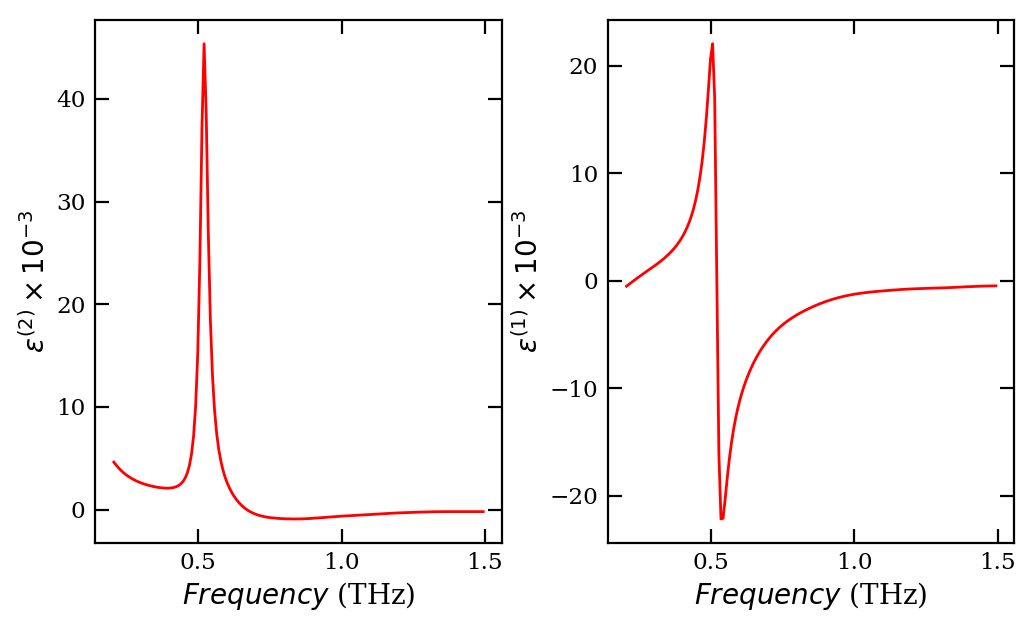

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

left,right_sample,right_subs,index,correc_subs,desv = 380,391.5,390,0,-0.028,100

f = plt.figure(figsize=(5, 3),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]
# params_window = ['flattop']
# params_window = ['barthann']

phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

print(len(ventana))

# Datos sin ventana.
x,y = getFilterdata(path_signal,right_sample,left)
x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

print('Discontinuidad:',D(np.array(y)))
y_subs_ventana = pd.Series(y_substrate_padding*ventana)
y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)


x = x-x.iloc[len(x)//2]
x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]
plt.subplot(121)

x_min, x_max = np.min(x_ref), np.max(x_ref)
period = x_max - x_min  # Longitud del período
n_repeats = 1
x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x_ref] + x_right)
y_periodic = np.tile(y_ref,n_repeats + 1)  
val = 1.8*2
# plt.plot(x_ref,y_ref/max(y_ref)+val,'--r',label='Reference using rectangle window')
# plt.plot(x_periodic, y_periodic/max(y_periodic)+val, color='red', alpha=0.4)


x_min, x_max = np.min(x), np.max(x)
period = x_max - x_min  # Longitud del período

n_repeats = 1
x_right = [x + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x] + x_right)
y_periodic = np.tile(y,  n_repeats + 1)  
x_ext = np.linspace(x_min,x_max,len(ventana))


# plt.plot(x,y/max(y),'k')
# # plt.xlabel('t (ps)')
# nn = -220
# plt.plot(x_periodic[:nn], (y_periodic/max(y_periodic))[:nn], color='black', alpha=0.4)
# # plt.plot(x_ext,ventana,'ro',label=f'{params_window[0]} window')
# plt.plot(x_ext,y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana),'r',label=f'Sample signal+Window+rectangle window')
# print((x_ext[1]-x_ext[0]))
# plt.title('a)')
# plt.xlabel('t (ps)')
# plt.ylabel('Electric field (a.u.)')
# # plt.legend(loc='lower right')
# # plt.xlim(max(x)-5,max(x)+)


# # Configurar los límites de la lupa
# zoom_xlim = (4,7)

# # Crear máscaras para cada señal en el rango de zoom
# mask_x = (x >= zoom_xlim[0]) & (x <= zoom_xlim[1])
# mask_x_periodic = (x_periodic >= zoom_xlim[0]) & (x_periodic <= zoom_xlim[1])
# mask_x_ext = (x_ext >= zoom_xlim[0]) & (x_ext <= zoom_xlim[1])

# # Obtener los valores de Y para cada señal en el rango de zoom
# y1_zoom = y[mask_x]/max(y)
# y2_zoom = (y_periodic/max(y_periodic))[mask_x_periodic]
# y3_zoom = (y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana))[mask_x_ext]

# # Calcular los límites Y considerando todas las señales
# y_min = min(np.min(y1_zoom), np.min(y2_zoom), np.min(y3_zoom))
# y_max = max(np.max(y1_zoom), np.max(y2_zoom), np.max(y3_zoom))
# margin = 0.1 * (y_max - y_min)  # 10% de margen

# # Crear la lupa
# ax = plt.gca()
# ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')

# # Graficar solo los datos en el rango de zoom (mejor rendimiento)
# ax_inset.plot(x[mask_x], y1_zoom, 'k', label='Señal rectangular')
# ax_inset.plot(x_periodic[mask_x_periodic], y2_zoom, color='black', alpha=0.4, label='Señal periódica')
# ax_inset.plot(x_ext[mask_x_ext], y3_zoom, 'r', label='Señal ventaneada')

# # Configurar los límites con margen
# ax_inset.set_xlim(zoom_xlim)
# ax_inset.set_ylim(y_min - margin, y_max + margin)

# # Añadir elementos de estilo
# ax_inset.grid(True, alpha=0.4)
# ax_inset.set_title(f'Zoom: {zoom_xlim[0]}-{zoom_xlim[1]} ps', fontsize=8)
# # ax_inset.legend(fontsize=6)

# # Resaltar región en gráfico principal
# ax.axvspan(zoom_xlim[0], zoom_xlim[1], color='blue', alpha=0.15)
# mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5", linestyle='--')


k = 15
nu = sp.fft.fftfreq(N, 1/30)
    # Aplicar ventana de Hamming a la señal



# Transformada de Fourier de las señales
fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

fft_y_signal= fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
fft_window = fft_window[mask]

global delta_ls_corr

delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n


# plt.subplot(122)

# plt.plot(nu_filtradas, np.abs(T_ventana),'r', label=f'{params_window[0]} window')
# plt.plot(nu_filtradas, np.abs(T), 'k',label='Rectangle window')
# plt.ylabel(r'$|T|$')
# plt.title('b)')
# plt.yscale('log')
# plt.xlabel(r'$\nu$ [THz]')
# #plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')


# plt.yscale('log')
# #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
# # plt.legend()

plt.subplot(121)
plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'r', label=f'{params_window[0]} window')
# plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'k',label='Rectangle window')
plt.xlabel(r'$Frequency$ (THz)')
#plt.yscale('log')
plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
#plt.xlabel(r'$\omega$ [THz]')
# plt.legend()


plt.subplot(122)
plt.plot(nu_filtradas, np.real(ep_con)*1e-3, 'r', label=f'{params_window[0]} window')
# plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'k',label='Rectangle windows')
plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
plt.xlabel(r'$Frequency$ (THz)')
#plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
# plt.legend()


# plt.savefig("fig2.png", dpi=300, bbox_inches='tight', format='png')
  

plt.show()



C:\Users\esteb\AppData\Local\Temp\ipykernel_39472\2581054131.py:85: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


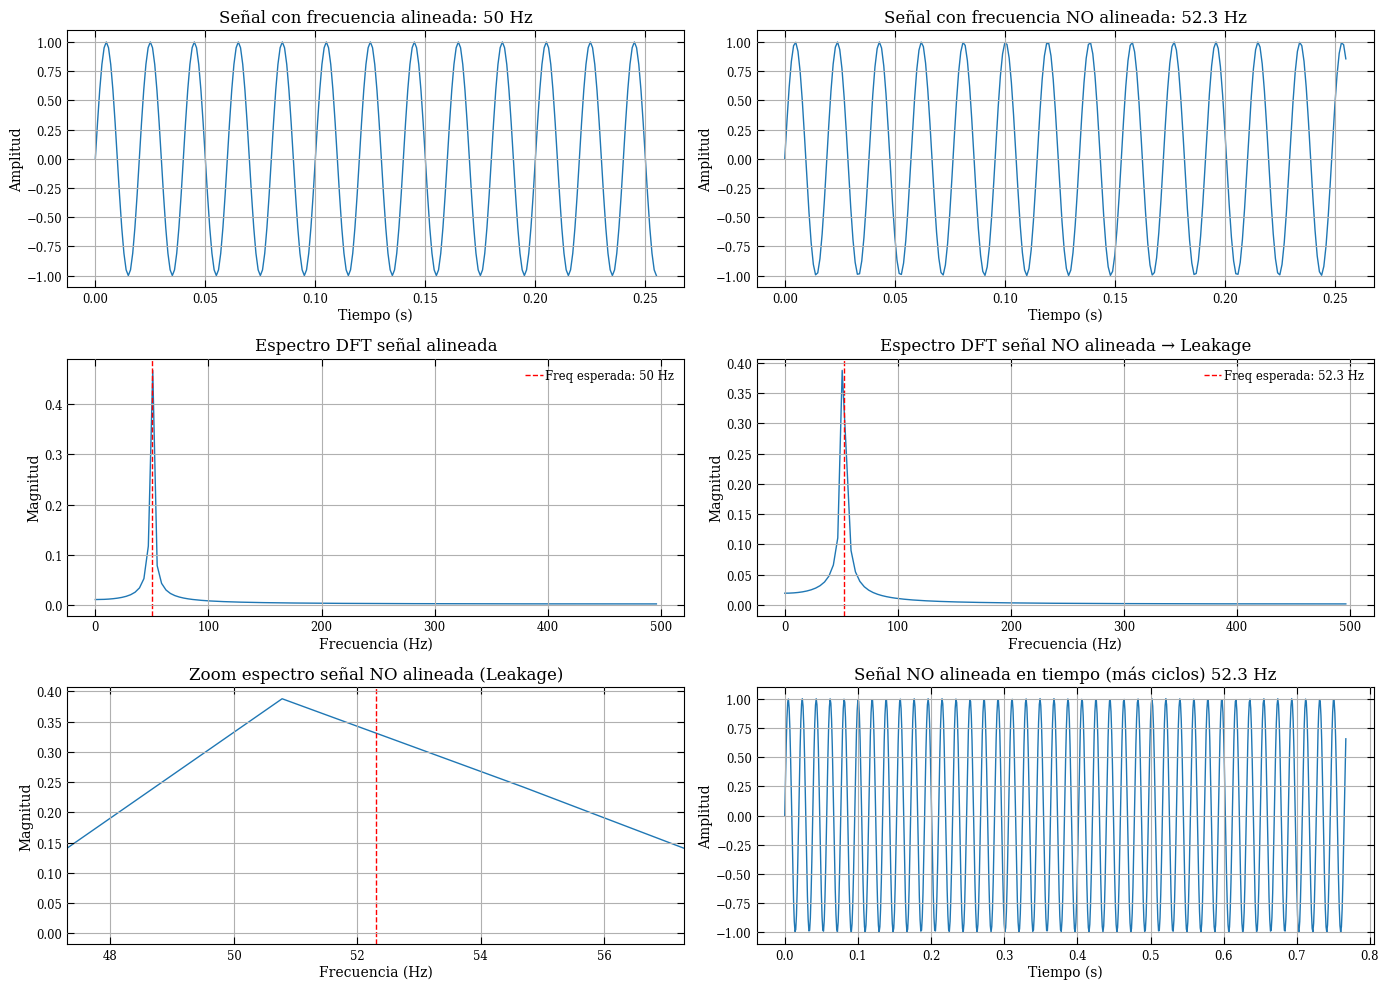

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000       # frecuencia de muestreo (Hz)
N = 256         # número de muestras (tamaño ventana)
t = np.arange(N) / fs

# Frecuencias para señales
f_alineada = 50        # frecuencia alineada con bin DFT (exacta)
f_no_alineada = 52.3   # frecuencia no alineada → leakage

# Señales
x_alineada = np.sin(2 * np.pi * f_alineada * t)
x_no_alineada = np.sin(2 * np.pi * f_no_alineada * t)

# DFT (módulo normalizado)
X_alineada = np.abs(np.fft.fft(x_alineada)) / N
X_no_alineada = np.abs(np.fft.fft(x_no_alineada)) / N

# Frecuencias de la DFT
freqs = np.fft.fftfreq(N, d=1/fs)
half = N // 2

plt.figure(figsize=(14, 10))

# Señal alineada en el tiempo
plt.subplot(3,2,1)
plt.plot(t, x_alineada)
plt.title(f"Señal con frecuencia alineada: {f_alineada} Hz")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

# Señal no alineada en el tiempo
plt.subplot(3,2,2)
plt.plot(t, x_no_alineada)
plt.title(f"Señal con frecuencia NO alineada: {f_no_alineada} Hz")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

# Espectro señal alineada
plt.subplot(3,2,3)
plt.plot(freqs[:half], X_alineada[:half])
plt.title("Espectro DFT señal alineada")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
# Marcamos la frecuencia esperada
plt.axvline(f_alineada, color='r', linestyle='--', label=f"Freq esperada: {f_alineada} Hz")
plt.legend()

# Espectro señal no alineada
plt.subplot(3,2,4)
plt.plot(freqs[:half], X_no_alineada[:half])
plt.title("Espectro DFT señal NO alineada → Leakage")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
# Marcamos la frecuencia esperada
plt.axvline(f_no_alineada, color='r', linestyle='--', label=f"Freq esperada: {f_no_alineada} Hz")
plt.legend()

# Zoom en espectro con leakage para mejor detalle
plt.subplot(3,2,5)
plt.plot(freqs[:half], X_no_alineada[:half])
plt.xlim(f_no_alineada - 5, f_no_alineada + 5)
plt.title("Zoom espectro señal NO alineada (Leakage)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.axvline(f_no_alineada, color='r', linestyle='--')

# Zoom en señal no alineada en tiempo (más ciclos)
t_zoom = np.arange(3*N) / fs  # 3 veces la ventana para ver más ciclos
x_no_alineada_zoom = np.sin(2 * np.pi * f_no_alineada * t_zoom)
plt.subplot(3,2,6)
plt.plot(t_zoom, x_no_alineada_zoom)
plt.title(f"Señal NO alineada en tiempo (más ciclos) {f_no_alineada} Hz")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()
